In [13]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.ticker import ScalarFormatter
import pandas as pd
import pandas as pd
import rasterio
import os

In [105]:
# # Schneetiefen  Plotten und an bestimmtem Punkt ausgeben
# # Definiere das gewünschte Datum (einschließlich Uhrzeit)
# target_date = '2020-05-02T21:00:00.000000000'  # Ersetze dies durch das gewünschte Datum und die Uhrzeit

# # Wähle die Variable 'snowdepth_month' für das definierte Datum aus
# # Verwende 'nearest', um den nächsten Zeitpunkt zu finden
# snowdepth_data = nc['snowdepth_month'].sel(time1=target_date, method='nearest')

# # Koordinaten der Zielstation (in UTM)
# #target_x = 632980.0
# #target_y = 5183868.6
# target_x = 635364.38
# target_y = 5184887.14

# # Extrahiere die x- und y-Koordinaten aus dem Dataset
# x_coords = nc['x'].values
# y_coords = nc['y'].values

# # Berechne die Differenz zwischen den Zielkoordinaten und den Koordinaten im Dataset
# dist_x = np.abs(x_coords - target_x)  # Differenz der x-Koordinaten
# dist_y = np.abs(y_coords - target_y)  # Differenz der y-Koordinaten

# # Erstelle ein Meshgrid für die Berechnung der Distanzmatrix
# dist_x_grid, dist_y_grid = np.meshgrid(dist_x, dist_y)

# # Berechne die Distanzmatrix
# distances = np.sqrt(dist_x_grid**2 + dist_y_grid**2)  # Keine Transposition mehr notwendig

# # Finde den Index des Punktes mit der kleinsten Distanz
# min_index = np.unravel_index(np.argmin(distances), distances.shape)

# # Extrahiere die x und y Koordinaten des nächstgelegenen Punktes
# closest_x = x_coords[min_index[1]]
# closest_y = y_coords[min_index[0]]

# # Extrahiere die Schneetiefe für den nächstgelegenen Punkt
# snowdepth_at_station = snowdepth_data.isel(x=min_index[1], y=min_index[0])

# # Erstelle den Plot
# plt.figure(figsize=(12, 6))

# # Plotten der 'snowdepth_month' Daten als 2D-Heatmap
# snowdepth_data.plot(cmap='Blues', add_colorbar=True)

# # Titel und Achsenbeschriftungen
# plt.title(f'Snow Depth on {target_date[:10]}')  # Nur das Datum ohne Uhrzeit im Titel
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# # Zeige den Wert an einem bestimmten Punkt (nächster Punkt zu target_x, target_y)
# plt.text(closest_x, closest_y, f'{snowdepth_at_station.values:.2f} m', 
#          color='red', fontsize=12, ha='center', va='center')

# # Zeige das Plot an
# plt.tight_layout()
# plt.show()

# # Ausgabe der Koordinaten und Schneetiefe für den nächstgelegenen Punkt
# print(f"Nächstgelegene Koordinaten: x = {closest_x}, y = {closest_y}")
# print(f"Schneetiefe Punkt HEF02: {snowdepth_at_station.values} m")



In [107]:
# # 2 PLOTS
# # Zeitreihe für Schneetiefe an bestimmtem Punkt ausgeben
# # Zeitreihe für Temperatur und NS an betimmtem Punkt ausgeben

# # Definiere die Koordinaten der Zielstation (in UTM)
# # target_x = 632980.0
# # target_y = 5183868.6
# target_x = 635364.38
# target_y = 5184887.14
# # Extrahiere die x- und y-Koordinaten aus dem Dataset
# x_coords = nc['x'].values
# y_coords = nc['y'].values

# # Berechne die Differenz zwischen den Zielkoordinaten und den Koordinaten im Dataset
# dist_x = np.abs(x_coords - target_x)  # Differenz der x-Koordinaten
# dist_y = np.abs(y_coords - target_y)  # Differenz der y-Koordinaten

# # Erstelle ein Meshgrid für die Berechnung der Distanzmatrix
# dist_x_grid, dist_y_grid = np.meshgrid(dist_x, dist_y)

# # Berechne die Distanzmatrix
# distances = np.sqrt(dist_x_grid**2 + dist_y_grid**2)

# # Finde den Index des Punktes mit der kleinsten Distanz
# min_index = np.unravel_index(np.argmin(distances), distances.shape)

# # Extrahiere die x und y Koordinaten des nächstgelegenen Punktes
# closest_x = x_coords[min_index[1]]
# closest_y = y_coords[min_index[0]]

# # Extrahiere die Schneetiefe über den gesamten Zeitraum für diesen Punkt
# snowdepth_data = nc['snowdepth_month'][:, min_index[0], min_index[1]]  # Schneetiefe für alle Zeitpunkte

# # Extrahiere die Temperaturdaten für den gleichen Zeitraum und Punkt
# temperature_data = nc['temp_month'][:, min_index[0], min_index[1]]  # Angenommen, Temperaturdaten sind in 'temp_month'

# # Extrahiere die Niederschlagsdaten für den gleichen Zeitraum und Punkt
# precip_data = nc['precip_month'][:, min_index[0], min_index[1]]  # Angenommen, Niederschlagsdaten sind in 'precip_month'

# # Erstelle den ersten Plot für die Schneetiefe
# plt.figure(figsize=(12, 6))
# plt.plot(nc['time1'].values, snowdepth_data, label='Snow Depth', color='blue')
# plt.xlabel('Time')
# plt.ylabel('Snow Depth (m)')
# plt.title(f'Snow Depth Time Series at ({closest_x}, {closest_y})')
# plt.legend()
# plt.tight_layout()
# plt.show()

# # Erstelle den zweiten Plot für Temperatur und Niederschlag
# fig, ax1 = plt.subplots(figsize=(12, 6))

# # Plot der Temperaturdaten auf der linken y-Achse
# ax1.plot(nc['time1'].values, temperature_data, label='Temperature', color='red')
# ax1.set_xlabel('Time')
# ax1.set_ylabel('Temperature (°C)', color='red')
# ax1.tick_params(axis='y', labelcolor='red')

# # Erstelle eine zweite y-Achse für den Niederschlag
# ax2 = ax1.twinx()
# ax2.plot(nc['time1'].values, precip_data, label='Precipitation', color='green')
# ax2.set_ylabel('Precipitation (mm)', color='green')
# ax2.tick_params(axis='y', labelcolor='green')

# # Titel und Legende
# plt.title(f'Temperature and Precipitation Time Series at ({closest_x}, {closest_y})')
# fig.tight_layout()
# plt.show()

# # Ausgabe der Koordinaten und der Schneetiefe für den nächstgelegenen Punkt
# print(f"Nächstgelegene Koordinaten: x = {closest_x}, y = {closest_y}")

In [109]:
# # Zeitreihe für bestimmten Punt ausgeben 

# # Definiere die Koordinaten der Zielstation (in UTM)
# # target_x = 632980.0
# # target_y = 5183868.6

# target_x = 635364.38
# target_y = 5184887.14

# # Extrahiere die x- und y-Koordinaten aus dem Dataset
# x_coords = nc['x'].values
# y_coords = nc['y'].values

# # Berechne die Differenz zwischen den Zielkoordinaten und den Koordinaten im Dataset
# dist_x = np.abs(x_coords - target_x)  # Differenz der x-Koordinaten
# dist_y = np.abs(y_coords - target_y)  # Differenz der y-Koordinaten

# # Erstelle ein Meshgrid für die Berechnung der Distanzmatrix
# dist_x_grid, dist_y_grid = np.meshgrid(dist_x, dist_y)

# # Berechne die Distanzmatrix
# distances = np.sqrt(dist_x_grid**2 + dist_y_grid**2)

# # Finde den Index des Punktes mit der kleinsten Distanz
# min_index = np.unravel_index(np.argmin(distances), distances.shape)

# # Extrahiere die x und y Koordinaten des nächstgelegenen Punktes
# closest_x = x_coords[min_index[1]]
# closest_y = y_coords[min_index[0]]

# # Extrahiere die Schneetiefe über den gesamten Zeitraum für diesen Punkt
# snowdepth_data = nc['snowdepth_month'][:, min_index[0], min_index[1]]  # Schneetiefe für alle Zeitpunkte

# # Extrahiere die Temperaturdaten für den gleichen Zeitraum und Punkt
# temperature_data = nc['temp_month'][:, min_index[0], min_index[1]]  # Angenommen, Temperaturdaten sind in 'temperature'

# # Erstelle den Plot der Zeitreihe
# fig, ax1 = plt.subplots(figsize=(12, 6))

# # Plot der Schneetiefe über den gesamten Zeitraum
# ax1.plot(nc['time1'].values, snowdepth_data, color='b', label='Snow Depth')
# ax1.set_xlabel('Time')
# ax1.set_ylabel('Snow Depth (m)', color='b')
# ax1.tick_params(axis='y', labelcolor='b')  # Setzt die Farbe der linken y-Achse

# # Erstelle eine zweite y-Achse für die Temperatur
# ax2 = ax1.twinx()
# ax2.plot(nc['time1'].values, temperature_data, color='r', label='Temperature')
# ax2.set_ylabel('Temperature (°C)', color='r')
# ax2.tick_params(axis='y', labelcolor='r')  # Setzt die Farbe der rechten y-Achse

# # Titel und Achsenbeschriftungen
# plt.title(f'Snow Depth and Temperature Time Series at ({closest_x}, {closest_y})')

# # Zeige das Plot an
# fig.tight_layout()
# plt.show()

# # Ausgabe der Koordinaten und der Schneetiefe für den nächstgelegenen Punkt
# print(f"Nächstgelegene Koordinaten: x = {closest_x}, y = {closest_y}")


In [ ]:
# ### RICHTIGER CRYOLAYER PLOT!
# # Variable zu  bestimmtem Zeitschritt plotten 

# # Definiere den Variablennamen und das gewünschte Datum
# variable_name = 'cryolayer'  # Ersetze dies durch das tatsächliche Variablennamen
# target_date = '2020-10-02T21:00:00.000000000'  # Ersetze dies durch das gewünschte Datum mit Uhrzeit

# # Wähle die Variable für das spezifische Datum aus
# # Wir verwenden hier 'nearest', um den nächstgelegenen Zeitpunkt zu finden
# data_to_plot = nc[variable_name].sel(time2=target_date, method='nearest')

# # Definiere benutzerdefinierte Farben und Werte für die Legende
# cmap = mcolors.ListedColormap(['#B0E0E6', '#00BFFF', '#4682B4', '#1E90FF', '#0000FF'])  # Blautöne
# bounds = [-1, 0, 1, 2, 3, 4]  # Grenzen für die Farbkategorisierung
# norm = mcolors.BoundaryNorm(boundaries=bounds, ncolors=cmap.N)

# # Plotten der Daten mit contourf
# plt.figure(figsize=(10, 6))
# contour = data_to_plot.plot.contourf(cmap=cmap, norm=norm, levels=bounds, add_colorbar=False)

# # Farbskala hinzufügen
# cbar = plt.colorbar(contour, ticks=[-1, 0, 1, 2, 3], orientation='vertical')

# # Beschriftungen der Farbskala anpassen, um sie in die Mitte jedes Farbbereichs zu setzen
# tick_labels = ['SNOW FREE','NEW SNOW','OLD SNOW', 'FIRN', 'ICE']
# #tick_labels = ['NEW SNOW','OLD SNOW','FIRN', 'ICE','SNOW FREE'] # vertauscht
# cbar.set_ticks([(-1 + 0) / 2, (0 + 1) / 2, (1 + 2) / 2, (2 + 3) / 2, (3 + 4) / 2])
# cbar.set_ticklabels(tick_labels)

# # Titel und Achsenbeschriftung
# plt.title(f'{variable_name} on {target_date[:10]}')  # Nur das Datum ohne Uhrzeit im Titel
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# # Zeige das Plot an
# plt.show()


In [2]:
# Definiere den Pfad zur NetCDF-Datei

input_path = "D:/results_finalrun/output_grids.nc"
#input_path = "C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/results_all_sa/output_grids.nc"
# Öffne das Dataset
nc = xr.open_dataset(input_path)         #, engine='store')

#print(nc)  # Zeigt das gesamte Dataset an
nc


<xarray.Dataset> Size: 14GB
Dimensions:             (time1: 96, y: 451, x: 644, time2: 2919, snow_layer: 4,
                         nbnd: 2)
Coordinates:
    time1_bounds        (time1, nbnd) datetime64[ns] 2kB ...
  * time1               (time1) datetime64[ns] 768B 2013-09-30T21:00:00 ... 2...
    time2_bounds        (time2, nbnd) datetime64[ns] 47kB ...
  * time2               (time2) datetime64[ns] 23kB 2013-09-04T21:00:00 ... 2...
  * x                   (x) float64 5kB 6.228e+05 6.229e+05 ... 6.55e+05
  * y                   (y) float64 4kB 5.201e+06 5.2e+06 ... 5.178e+06
    crs                 int64 8B ...
  * snow_layer          (snow_layer) int64 32B 0 1 2 3
Dimensions without coordinates: nbnd
Data variables:
    temp_month          (time1, y, x) float32 112MB ...
    precip_month        (time1, y, x) float32 112MB ...
    snowdepth_month     (time1, y, x) float32 112MB ...
    snow_thickness_day  (time2, snow_layer, y, x) float32 14GB ...
Attributes:
    Conventions:  CF-1.7

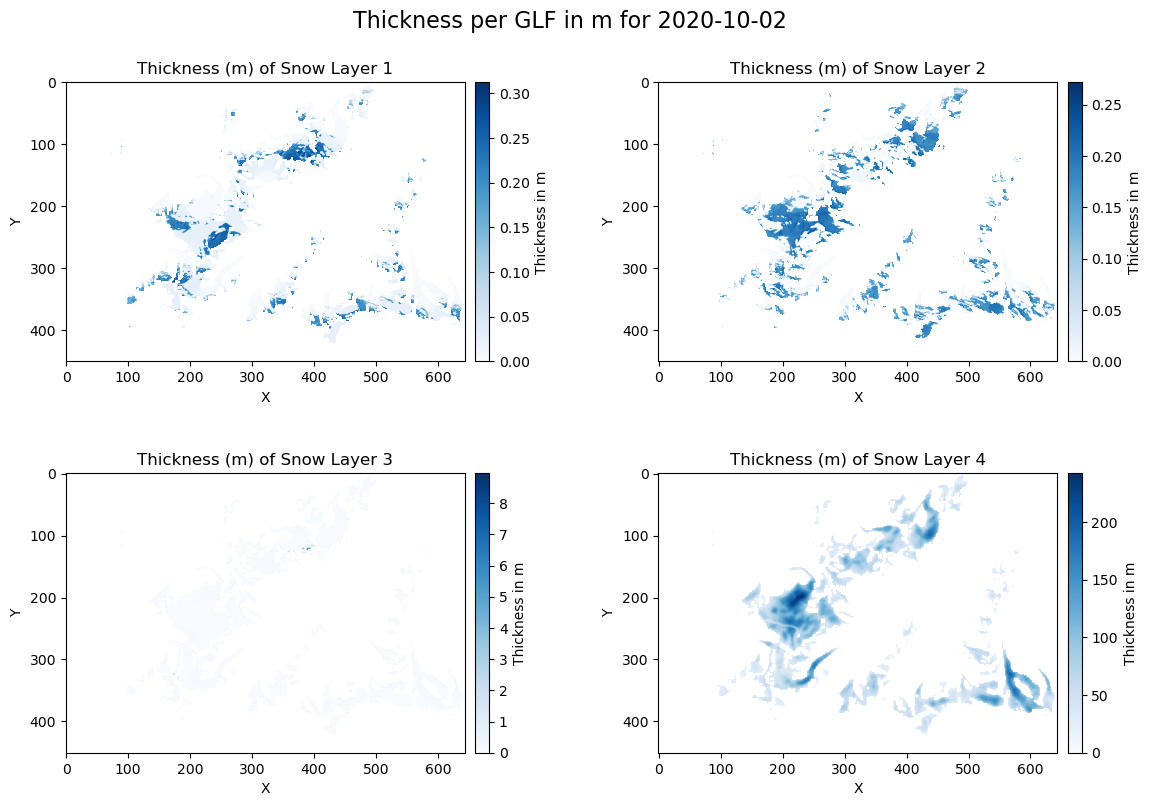

In [9]:
# Snow_Thickness Layer zu einem Zeitpunkt

# Pfad zur ASCII-Gletschermaske
mask_file = "C:/Users/csba2938/Documents/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"

# Gletschermaske einlesen
import rasterio
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Definiere das gewünschte Datum
target_date = '2020-10-02T21:00:00.000000000'
# Hole nur das Datum ohne Uhrzeit (YYYY-MM-DD)
date_str = target_date[:10]  # Extrahiere nur das Datum (YYYY-MM-DD)

# Finde den Index für das angegebene Datum
time_index = nc['time2'].sel(time2=target_date, method='nearest').time2.values

# Wähle die Variable 'snow_thickness_day' für den spezifischen Zeitschritt
snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

# Anzahl der Schneeschichten
num_layers = 4

# Hole das Datum für den Titel
date = str(nc["time2"].sel(time2=target_date, method='nearest').values)[:10]

# Erstelle eine 4-geteilte Grafik
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 Anordnung
axs = axs.flatten()  # Einfachere Iteration über Achsen

# Blau-Farbverlauf für die Schneestärke
cmap = plt.cm.Blues

# Iteriere über die Schneeschichten und plottet jede Schicht
for i in range(num_layers):
    # Extrahiere die Schneeschicht-Daten
    layer_data = snow_thickness.isel(snow_layer=i).values

    # Wende die Gletschermaske an (außerhalb von Gletschern NaN setzen)
    masked_data = np.where(glacier_mask == 1, layer_data, np.nan)

    # Plotten
    im = axs[i].imshow(masked_data, cmap=cmap)
    axs[i].set_title(f'Thickness (m) of Snow Layer {i+1}')
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')

    # Farbskala für jeden Subplot
    cbar = plt.colorbar(im, ax=axs[i], orientation='vertical', pad=0.02)
    cbar.set_label('Thickness in m')

# Übergreifender Titel für die gesamte Grafik
fig.suptitle(f'Thickness per GLF in m for {date}', fontsize=16)

# Layout anpassen und Platz für Titel
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Layout anpassen und Platz für Titel

# Erhöhe den Abstand zwischen den oberen und unteren Plots
plt.subplots_adjust(hspace=0.4)

# Ordner für die Speicherung des Plots
output_folder = "C:/Users/csba2938/Documents/Anne/Jupyter Grafiken/snow_thickness_layer"
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, f'snow_thickness_layers_{date_str}.png')
plt.savefig(output_path)

plt.show()


In [7]:
# März, Juni, September jedes jahres 2014-21 Snow_thickness_day
# Pfad zur ASCII-Gletschermaske
mask_file = "C:/Users/csba2938/Documents/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"

# Gletschermaske einlesen
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Jahre und Ziel-Daten definieren
years = range(2015, 2021)  # Jahre 2015-2021
dates = ['03-01', '06-01', '09-01']  # Monate und Tage

# Anzahl der Schneeschichten
num_layers = 4

# Farbskalen für die Legenden (pro Layer)
color_limits = [(0, 1), (0, 4), (0, 10), (0, 250)]

# Iteriere über Jahre und Ziel-Daten
for year in years:
    for date_suffix in dates:
        # Ziel-Datum definieren
        target_date = f'{year}-{date_suffix}T21:00:00.000000000'

        try:
            # Wähle den entsprechenden Zeitschritt
            snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

            # Hole das tatsächliche Datum für den Titel
            actual_date = str(nc["time2"].sel(time2=target_date, method='nearest').values)[:10]

            # Erstelle die Abbildung
            fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 Anordnung
            axs = axs.flatten()  # Einfachere Iteration über Achsen

            # Blau-Farbverlauf für die Schneestärke
            cmap = plt.cm.Blues

            # Iteriere über die Schneeschichten und plottet jede Schicht
            for i in range(num_layers):
                # Extrahiere die Schneeschicht-Daten
                layer_data = snow_thickness.isel(snow_layer=i).values

                # Wende die Gletschermaske an (außerhalb von Gletschern NaN setzen)
                masked_data = np.where(glacier_mask == 1, layer_data, np.nan)

                # Plotten mit festen Farbskalen
                vmin, vmax = color_limits[i]
                im = axs[i].imshow(masked_data, cmap=cmap, vmin=vmin, vmax=vmax)
                
                axs[i].set_title(f'Thickness (m) of Snow Layer {i+1}')
                axs[i].set_xlabel('X')
                axs[i].set_ylabel('Y')

                # Farbskala für jeden Subplot
                cbar = plt.colorbar(im, ax=axs[i], orientation='vertical', pad=0.02)
                cbar.set_label('Thickness in m')

            # Übergreifender Titel für die gesamte Grafik
            fig.suptitle(f'Thickness per GLF in m for {actual_date}', fontsize=16)

            # Layout anpassen und Platz für Titel
            plt.tight_layout(rect=[0, 0, 1, 0.96])

            # Erhöhe den Abstand zwischen den oberen und unteren Plots
            plt.subplots_adjust(hspace=0.4)  # Mehr Abstand zwischen den Zeilen

            # Abbildung speichern
            output_filename = f'snow_thickness_{year}_{date_suffix.replace("-", "")}.png'
            plt.savefig(output_filename)
            print(f'Abbildung gespeichert: {output_filename}')

            plt.close(fig)  # Speicher freigeben

        except Exception as e:
            print(f"Fehler für {target_date}: {e}. Überspringe.")


Abbildung gespeichert: snow_thickness_2015_0301.png
Abbildung gespeichert: snow_thickness_2015_0601.png
Abbildung gespeichert: snow_thickness_2015_0901.png
Abbildung gespeichert: snow_thickness_2016_0301.png
Abbildung gespeichert: snow_thickness_2016_0601.png
Abbildung gespeichert: snow_thickness_2016_0901.png
Abbildung gespeichert: snow_thickness_2017_0301.png
Abbildung gespeichert: snow_thickness_2017_0601.png
Abbildung gespeichert: snow_thickness_2017_0901.png
Abbildung gespeichert: snow_thickness_2018_0301.png
Abbildung gespeichert: snow_thickness_2018_0601.png
Abbildung gespeichert: snow_thickness_2018_0901.png
Abbildung gespeichert: snow_thickness_2019_0301.png
Abbildung gespeichert: snow_thickness_2019_0601.png
Abbildung gespeichert: snow_thickness_2019_0901.png
Abbildung gespeichert: snow_thickness_2020_0301.png
Abbildung gespeichert: snow_thickness_2020_0601.png
Abbildung gespeichert: snow_thickness_2020_0901.png


In [ ]:
#Snow_thickness_day für einen ganzen Monat (juni2019)
# Pfad zur ASCII-Gletschermaske
mask_file = "C:/Users/csba2938/Documents/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"

# Gletschermaske einlesen
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Anzahl der Schneeschichten
num_layers = 4

# Farbskalen für die Legenden (pro Layer)
color_limits = [(0, 1), (0, 4), (0, 10), (0, 250)]

# Erstelle eine Liste mit allen Tagen im Juni 2019
dates_june_2019 = pd.date_range(start="2019-07-01", end="2019-07-31", freq='D')

# Iteriere über die Tage im Juni 2019
for date in dates_june_2019:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Hole das tatsächliche Datum für den Titel
        actual_date = str(nc["time2"].sel(time2=target_date, method='nearest').values)[:10]

        # Erstelle die Abbildung
        fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 Anordnung
        axs = axs.flatten()  # Einfachere Iteration über Achsen

        # Blau-Farbverlauf für die Schneestärke
        cmap = plt.cm.Blues

        # Iteriere über die Schneeschichten und plottet jede Schicht
        for i in range(num_layers):
            # Extrahiere die Schneeschicht-Daten
            layer_data = snow_thickness.isel(snow_layer=i).values

            # Wende die Gletschermaske an (außerhalb von Gletschern NaN setzen)
            masked_data = np.where(glacier_mask == 1, layer_data, np.nan)

            # Plotten mit festen Farbskalen
            vmin, vmax = color_limits[i]
            im = axs[i].imshow(masked_data, cmap=cmap, vmin=vmin, vmax=vmax)
            
            axs[i].set_title(f'Thickness (m) of Snow Layer {i+1}')
            axs[i].set_xlabel('X')
            axs[i].set_ylabel('Y')

            # Farbskala für jeden Subplot
            cbar = plt.colorbar(im, ax=axs[i], orientation='vertical', pad=0.02)
            cbar.set_label('Thickness in m')

        # Übergreifender Titel für die gesamte Grafik
        fig.suptitle(f'Thickness per GLF in m for {actual_date}', fontsize=16)

        # Layout anpassen und Platz für Titel
        plt.tight_layout(rect=[0, 0, 1, 0.96])

        # Erhöhe den Abstand zwischen den oberen und unteren Plots
        plt.subplots_adjust(hspace=0.4)  # Mehr Abstand zwischen den Zeilen

        # Abbildung speichern
        output_filename = f'snow_thickness_{actual_date.replace("-", "")}.png'
        plt.savefig(output_filename)
        print(f'Abbildung gespeichert: {output_filename}')

        plt.close(fig)  # Speicher freigeben

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")


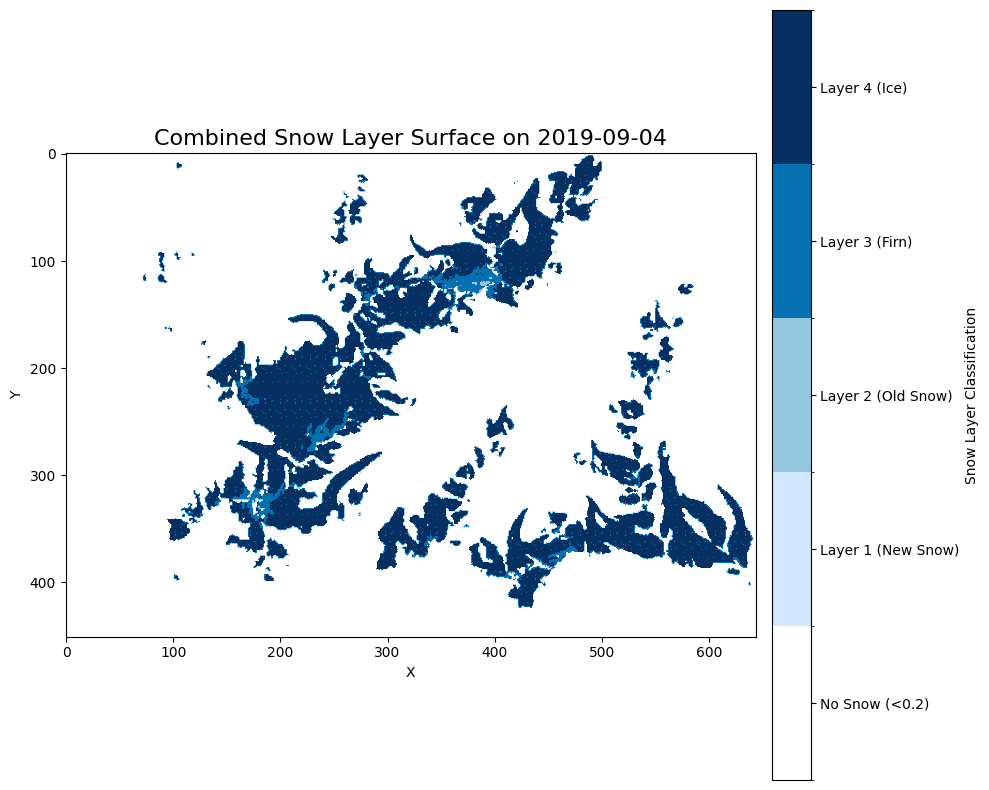

In [4]:
#Cryolayer für Einzeldatum (gestapelte snow_layer > 0.2) 

# Pfad zur ASCII-Gletschermaske
mask_file = "C:/Users/csba2938/Documents/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"

# Gletschermaske einlesen
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Ziel-Datum definieren
target_date = '2019-05-24T21:00:00.000000000'

try:
    # Wähle den entsprechenden Zeitschritt
    snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

    # Hole das tatsächliche Datum für den Titel
    actual_date = str(nc["time2"].sel(time2=target_date, method='nearest').values)[:10]

    # Initialisiere eine leere Matrix für die kombinierten Schichten
    combined_layers = np.zeros_like(glacier_mask, dtype=np.int32)

    # Definiere eine Farbskala mit abgestuften Blautönen und Weiß für Werte unter 1
    cmap = ListedColormap(["#ffffff", "#d0e7ff", "#92c5de", "#0571b0", "#053061"])
    bounds = [0, 1, 2, 3, 4, 5]  # Kategorien: 0 (weiß), 1-4 (Layer 1-4)
    norm = BoundaryNorm(bounds, cmap.N)

    # Iteriere rückwärts über die Schichten (Layer 4 -> Layer 1)
    for i in range(4, 0, -1):
        # Extrahiere die aktuelle Schneeschicht
        layer_index = i - 1  # Passend zu snow_layer: 0 = Layer 1, 1 = Layer 2, ...
        layer_data = snow_thickness.isel(snow_layer=layer_index).values

        # Wende die Gletschermaske an und maskiere Werte <= 0.2
        mask = (glacier_mask == 1) & (layer_data > 0.2)

        # Setze Werte, falls maskiert
        combined_layers[mask] = i

    # Plotten der kombinierten Schicht
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(combined_layers, cmap=cmap, norm=norm)

    # Legende manuell anpassen
    cbar = plt.colorbar(im, ax=ax, ticks=[0.5, 1.5, 2.5, 3.5, 4.5], orientation='vertical', pad=0.02)
    cbar.ax.set_yticklabels(['No Snow (<0.2)', 'Layer 1 (New Snow)', 'Layer 2 (Old Snow)', 'Layer 3 (Firn)', 'Layer 4 (Ice)'])
    cbar.set_label('Snow Layer Classification')

    ax.set_title(f'Glacier Surface Classification on {actual_date}', fontsize=16)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Fehler für {target_date}: {e}.")


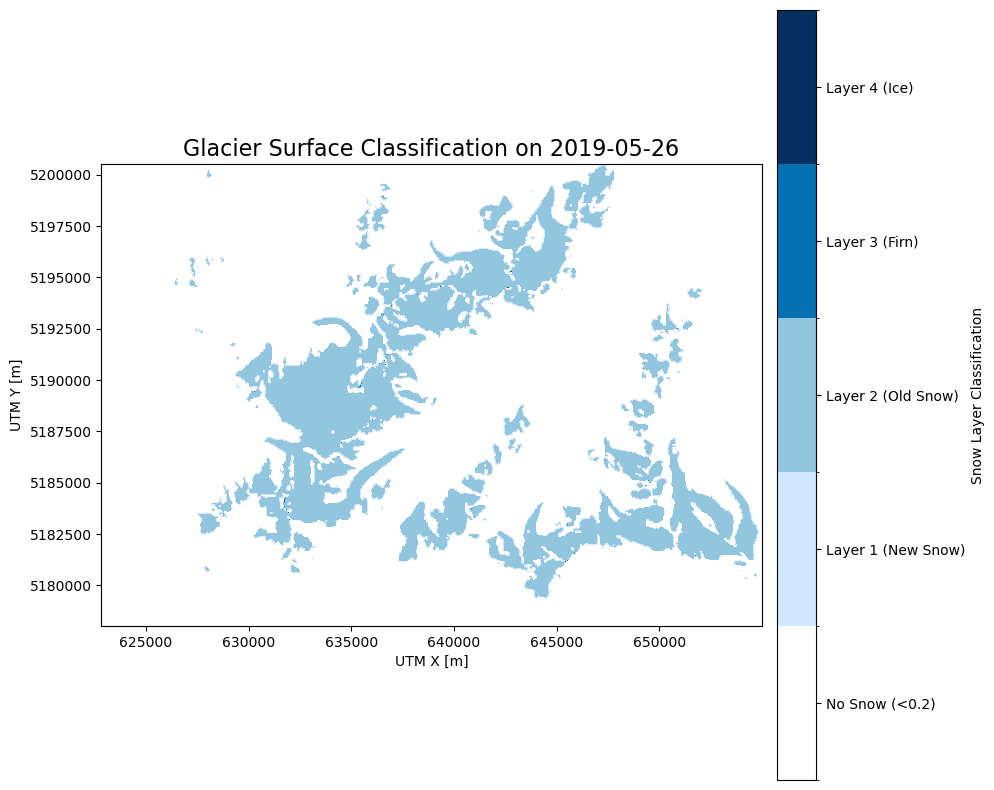

In [22]:
#Cryolayer für Einzeldatum (gestapelte snow_layer > 0.2) mit UTM

# Pfad zur ASCII-Gletschermaske
mask_file = "C:/Users/csba2938/Documents/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"

# Gletschermaske einlesen
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Ziel-Datum definieren
target_date = '2019-05-26T21:00:00.000000000'

try:
    # Wähle den entsprechenden Zeitschritt
    snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

    # Hole das tatsächliche Datum für den Titel
    actual_date = str(nc["time2"].sel(time2=target_date, method='nearest').values)[:10]

    # Initialisiere eine leere Matrix für die kombinierten Schichten
    combined_layers = np.zeros_like(glacier_mask, dtype=np.int32)

    # Definiere eine Farbskala mit abgestuften Blautönen und Weiß für Werte unter 1
    cmap = ListedColormap(["#ffffff", "#d0e7ff", "#92c5de", "#0571b0", "#053061"])
    bounds = [0, 1, 2, 3, 4, 5]  # Kategorien: 0 (weiß), 1-4 (Layer 1-4)
    norm = BoundaryNorm(bounds, cmap.N)

    # Iteriere rückwärts über die Schichten (Layer 4 -> Layer 1)
    for i in range(4, 0, -1):
        layer_index = i - 1
        layer_data = snow_thickness.isel(snow_layer=layer_index).values

        # Wende die Gletschermaske an und maskiere Werte <= 0.2
        mask = (glacier_mask == 1) & (layer_data > 0.2)

        combined_layers[mask] = i

    # --- UTM-Koordinaten von nc-Datei holen ---
    x_coords = nc['x'].values
    y_coords = nc['y'].values

    # Extent berechnen: [xmin, xmax, ymin, ymax]
    # Achtung: y-Achse muss richtig herum sein
    extent = [x_coords[0], x_coords[-1], y_coords[-1], y_coords[0]]


    # Plotten der kombinierten Schicht mit UTM-Achsen
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(combined_layers, cmap=cmap, norm=norm, extent=extent, origin='upper')

    # Achsenformatierung: Ganze Zahlen, keine wissenschaftliche Notation
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='both')  # Verhindert z. B. 5.2e6

    # Legende
    cbar = plt.colorbar(im, ax=ax, ticks=[0.5, 1.5, 2.5, 3.5, 4.5], orientation='vertical', pad=0.02)
    cbar.ax.set_yticklabels(['No Snow (<0.2)', 'Layer 1 (New Snow)', 'Layer 2 (Old Snow)', 'Layer 3 (Firn)', 'Layer 4 (Ice)'])
    cbar.set_label('Snow Layer Classification')

    ax.set_title(f'Glacier Surface Classification on {actual_date}', fontsize=16)
    ax.set_xlabel('UTM X [m]')
    ax.set_ylabel('UTM Y [m]')

    plt.tight_layout()
  

    # Speichern
    output_folder = "C:/Users/csba2938/Documents/Anne/Jupyter Grafiken/cryolayer_zu_enveo_2021"
    os.makedirs(output_folder, exist_ok=True)
    filename = f"snow_layers_{actual_date}.png"
    save_path = os.path.join(output_folder, filename)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Danach anzeigen
    plt.show()

except Exception as e:
    print(f"Fehler für {target_date}: {e}.")

In [23]:
#Cryolayer für gesamten Monat Juni 2019 (gestapelte snow_layer > 0.2) 

# Pfad zur ASCII-Gletschermaske
mask_file = "C:/Users/subha/Documents/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"

# Gletschermaske einlesen
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Farbskala und Norm für die Legende
cmap = ListedColormap(["#ffffff", "#d0e7ff", "#92c5de", "#0571b0", "#053061"])
bounds = [0, 1, 2, 3, 4, 5]  # Kategorien: 0 (weiß), 1-4 (Layer 1-4)
norm = BoundaryNorm(bounds, cmap.N)

# Erstelle eine Liste mit allen Tagen im Juni 2019
dates_june_2019 = pd.date_range(start="2019-06-01", end="2019-07-31", freq='D')

# Iteriere über die Tage im Juni 2019
for date in dates_june_2019:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Hole das tatsächliche Datum für den Titel
        actual_date = str(nc["time2"].sel(time2=target_date, method='nearest').values)[:10]

        # Initialisiere eine leere Matrix für die kombinierten Schichten
        combined_layers = np.zeros_like(glacier_mask, dtype=np.int32)

        # Iteriere rückwärts über die Schichten (Layer 4 -> Layer 1)
        for i in range(4, 0, -1):
            # Extrahiere die aktuelle Schneeschicht
            layer_index = i - 1  # Passend zu snow_layer: 0 = Layer 1, 1 = Layer 2, ...
            layer_data = snow_thickness.isel(snow_layer=layer_index).values

            # Wende die Gletschermaske an und maskiere Werte <= 0.2
            mask = (glacier_mask == 1) & (layer_data > 0.2)

            # Setze Werte, falls maskiert
            combined_layers[mask] = i

        # Plotten der kombinierten Schicht
        fig, ax = plt.subplots(figsize=(10, 8))
        im = ax.imshow(combined_layers, cmap=cmap, norm=norm)

        # Legende manuell anpassen
        cbar = plt.colorbar(im, ax=ax, ticks=[0.5, 1.5, 2.5, 3.5, 4.5], orientation='vertical', pad=0.02)
        cbar.ax.set_yticklabels(['No Snow (<0.2)', 'Layer 1 (New Snow)', 'Layer 2 (Old Snow)', 'Layer 3 (Firn)', 'Layer 4 (Ice)'])
        cbar.set_label('Snow Layer Classification')

        ax.set_title(f'Combined Snow Layer Surface on {actual_date}', fontsize=16)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

        plt.tight_layout()

        # Abbildung speichern
        output_filename = f'snow_layers_combined_{actual_date.replace("-", "")}.png'
        plt.savefig(output_filename)
        print(f'Abbildung gespeichert: {output_filename}')

        plt.close(fig)  # Speicher freigeben

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")


Abbildung gespeichert: snow_layers_combined_20190601.png
Abbildung gespeichert: snow_layers_combined_20190602.png
Abbildung gespeichert: snow_layers_combined_20190603.png
Abbildung gespeichert: snow_layers_combined_20190604.png
Abbildung gespeichert: snow_layers_combined_20190605.png
Abbildung gespeichert: snow_layers_combined_20190606.png
Abbildung gespeichert: snow_layers_combined_20190607.png
Abbildung gespeichert: snow_layers_combined_20190608.png
Abbildung gespeichert: snow_layers_combined_20190609.png
Abbildung gespeichert: snow_layers_combined_20190610.png
Abbildung gespeichert: snow_layers_combined_20190611.png
Abbildung gespeichert: snow_layers_combined_20190612.png
Abbildung gespeichert: snow_layers_combined_20190613.png
Abbildung gespeichert: snow_layers_combined_20190614.png
Abbildung gespeichert: snow_layers_combined_20190615.png
Abbildung gespeichert: snow_layers_combined_20190616.png
Abbildung gespeichert: snow_layers_combined_20190617.png
Abbildung gespeichert: snow_lay

In [25]:
#Cryolayer Farbverlauf für einen Monat

# Pfad zur ASCII-Gletschermaske
mask_file = "C:/Users/subha/Documents/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"

# Gletschermaske einlesen
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Farbverläufe für die einzelnen Layer
layer_cmaps = [
    LinearSegmentedColormap.from_list("Layer1", ["#d0e7ff", "#92c5de"]),
    LinearSegmentedColormap.from_list("Layer2", ["#92c5de", "#0571b0"]),
    LinearSegmentedColormap.from_list("Layer3", ["#0571b0", "#053061"]),
    LinearSegmentedColormap.from_list("Layer4", ["#053061", "#020c33"])
]

# Erstelle eine Liste mit allen Tagen im Juni 2019
dates_june_2019 = pd.date_range(start="2019-06-01", end="2019-07-30", freq='D')

# Iteriere über die Tage im Juni 2019
for date in dates_june_2019:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Hole das tatsächliche Datum für den Titel
        actual_date = str(nc["time2"].sel(time2=target_date, method='nearest').values)[:10]

        # Initialisiere eine Matrix für die kombinierte Farbdarstellung
        combined_colors = np.zeros((*glacier_mask.shape, 4), dtype=np.float32)  # RGBA-Farben

        # Iteriere rückwärts über die Schichten (Layer 4 -> Layer 1)
        for i in range(4, 0, -1):
            # Extrahiere die aktuelle Schneeschicht
            layer_index = i - 1  # Passend zu snow_layer: 0 = Layer 1, 1 = Layer 2, ...
            layer_data = snow_thickness.isel(snow_layer=layer_index).values

            # Wende die Gletschermaske an und maskiere Werte <= 0.2
            mask = (glacier_mask == 1) & (layer_data > 0.2)

            # Nur fortfahren, wenn gültige Werte vorhanden sind
            if mask.sum() > 0:
                # Skaliere die Werte des Layers für den Farbverlauf
                norm = Normalize(vmin=0.2, vmax=layer_data[mask].max())
                colors = layer_cmaps[layer_index](norm(layer_data))

                # Wende die Farben nur auf die maskierten Bereiche an
                combined_colors[mask] = colors[mask]

        # Prüfen, ob überhaupt Werte in den Layers vorhanden sind
        if np.sum(combined_colors[:, :, :3]) == 0:
            print(f"Keine gültigen Werte für alle Layer am {actual_date}. Überspringe gesamten Tag.")
            continue

        # Plotten der kombinierten Farbschichten
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_axes([0.1, 0.1, 0.6, 0.8])  # Hauptplot nach links verschieben
        im = ax.imshow(combined_colors)

        # Titel und Achsenbeschriftung
        ax.set_title(f'Combined Snow Layer Surface on {actual_date}', fontsize=16)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

        # Platz für die gestapelten Colorbars rechts reservieren
        cbar_positions = [0.15, 0.35, 0.55, 0.75]  # Y-Positionen für jede Colorbar
        for i, pos in enumerate(cbar_positions):
            # Normierung für jede Layer-Colorbar
            norm = Normalize(vmin=0.2, vmax=2.0)  # Beispielwerte anpassen
            sm = plt.cm.ScalarMappable(cmap=layer_cmaps[i], norm=norm)
            sm.set_array([])

            # Colorbar vollständig außerhalb der Abbildung platzieren
            cbar_ax = fig.add_axes([0.75, pos, 0.03, 0.1])  # [x, y, Breite, Höhe]
            cbar = plt.colorbar(sm, cax=cbar_ax)
            cbar.ax.set_title(f'Layer {i + 1}', fontsize=10)
            cbar.ax.tick_params(labelsize=8)

        plt.tight_layout()

        # Abbildung speichern
        output_filename = f'snow_layers_combined_gradient_{actual_date.replace("-", "")}.png'
        plt.savefig(output_filename)
        print(f'Abbildung gespeichert: {output_filename}')

        plt.close(fig)  # Speicher freigeben

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")


C:\Users\subha\AppData\Local\Temp\ipykernel_2088\3728555447.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Abbildung gespeichert: snow_layers_combined_gradient_20190601.png
Abbildung gespeichert: snow_layers_combined_gradient_20190602.png
Abbildung gespeichert: snow_layers_combined_gradient_20190603.png
Abbildung gespeichert: snow_layers_combined_gradient_20190604.png
Abbildung gespeichert: snow_layers_combined_gradient_20190605.png
Abbildung gespeichert: snow_layers_combined_gradient_20190606.png
Abbildung gespeichert: snow_layers_combined_gradient_20190607.png
Abbildung gespeichert: snow_layers_combined_gradient_20190608.png
Abbildung gespeichert: snow_layers_combined_gradient_20190609.png
Abbildung gespeichert: snow_layers_combined_gradient_20190610.png
Abbildung gespeichert: snow_layers_combined_gradient_20190611.png
Abbildung gespeichert: snow_layers_combined_gradient_20190612.png
Abbildung gespeichert: snow_layers_combined_gradient_20190613.png
Abbildung gespeichert: snow_layers_combined_gradient_20190614.png
Abbildung gespeichert: snow_layers_combined_gradient_20190615.png
Abbildung 

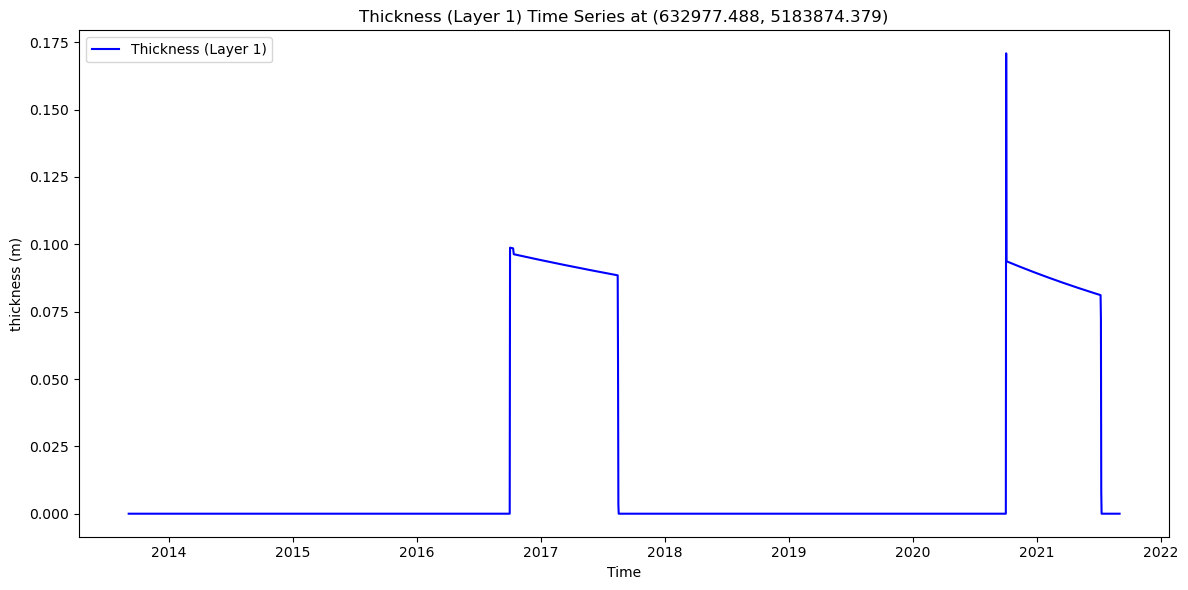

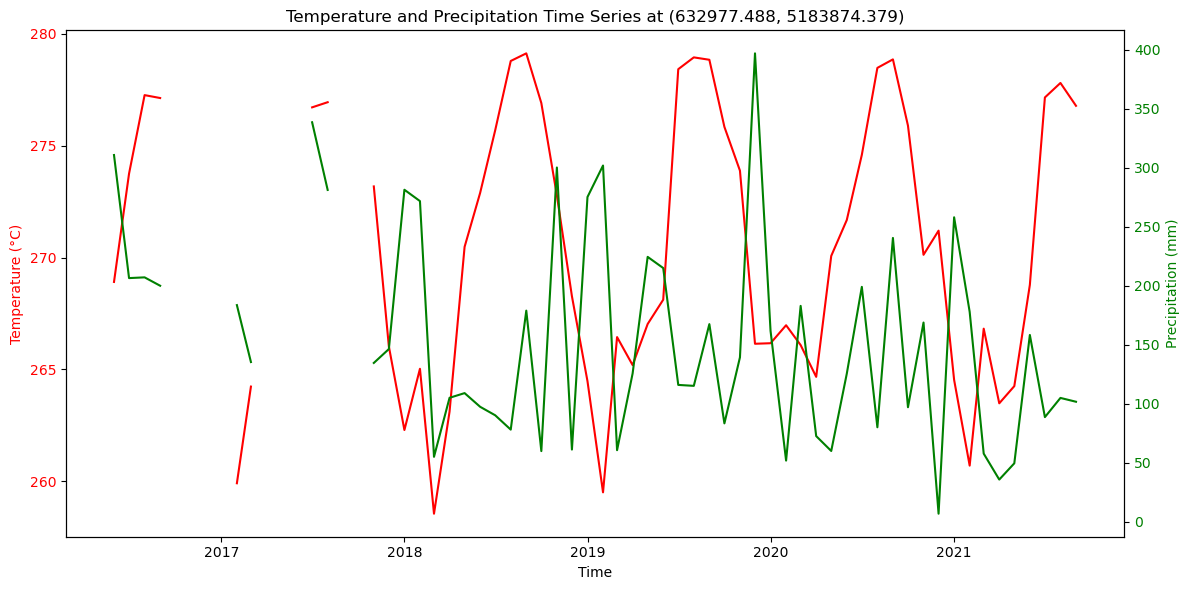

Nächstgelegene Koordinaten: x = 632977.488, y = 5183874.379


In [23]:
# Zeitreihe für Firnlayer

# Zeitreihe für Schneetiefe an bestimmtem Punkt ausgeben
# Zeitreihe für Temperatur und NS an betimmtem Punkt ausgeben

# Definiere die Koordinaten der Zielstation (in UTM)
target_x = 632980.0
target_y = 5183868.6
#target_x = 635364.38
#target_y = 5184887.14
# Extrahiere die x- und y-Koordinaten aus dem Dataset
x_coords = nc['x'].values
y_coords = nc['y'].values

# Berechne die Differenz zwischen den Zielkoordinaten und den Koordinaten im Dataset
dist_x = np.abs(x_coords - target_x)  # Differenz der x-Koordinaten
dist_y = np.abs(y_coords - target_y)  # Differenz der y-Koordinaten

# Erstelle ein Meshgrid für die Berechnung der Distanzmatrix
dist_x_grid, dist_y_grid = np.meshgrid(dist_x, dist_y)

# Berechne die Distanzmatrix
distances = np.sqrt(dist_x_grid**2 + dist_y_grid**2)

# Finde den Index des Punktes mit der kleinsten Distanz
min_index = np.unravel_index(np.argmin(distances), distances.shape)

# Extrahiere die x und y Koordinaten des nächstgelegenen Punktes
closest_x = x_coords[min_index[1]]
closest_y = y_coords[min_index[0]]

# Extrahiere die Schneetiefe für `snow_layer=1` über den gesamten Zeitraum für diesen Punkt
snow_thickness_layer_1 = nc['snow_thickness_day'][:,2, min_index[0], min_index[1]]  # Schneetiefe für Layer 1

# Extrahiere die Temperaturdaten für den gleichen Zeitraum und Punkt
temperature_data = nc['temp_month'][:, min_index[0], min_index[1]]  # Angenommen, Temperaturdaten sind in 'temp_month'

# Extrahiere die Niederschlagsdaten für den gleichen Zeitraum und Punkt
precip_data = nc['precip_month'][:, min_index[0], min_index[1]]  # Angenommen, Niederschlagsdaten sind in 'precip_month'

# Erstelle den ersten Plot für die Schneetiefe des snow_layer=1
plt.figure(figsize=(12, 6))
plt.plot(nc['time2'].values, snow_thickness_layer_1, label='Thickness (Layer 1)', color='blue')
plt.xlabel('Time')
plt.ylabel('thickness (m)')
plt.title(f'Thickness (Layer 1) Time Series at ({closest_x}, {closest_y})')
plt.legend()
plt.tight_layout()
plt.show()

# Erstelle den zweiten Plot für Temperatur und Niederschlag (unverändert)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot der Temperaturdaten auf der linken y-Achse
ax1.plot(nc['time1'].values, temperature_data, label='Temperature', color='red')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Erstelle eine zweite y-Achse für den Niederschlag
ax2 = ax1.twinx()
ax2.plot(nc['time1'].values, precip_data, label='Precipitation', color='green')
ax2.set_ylabel('Precipitation (mm)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Titel und Legende
plt.title(f'Temperature and Precipitation Time Series at ({closest_x}, {closest_y})')
fig.tight_layout()
plt.show()

# Ausgabe der Koordinaten und der Schneetiefe für den nächstgelegenen Punkt
print(f"Nächstgelegene Koordinaten: x = {closest_x}, y = {closest_y}")

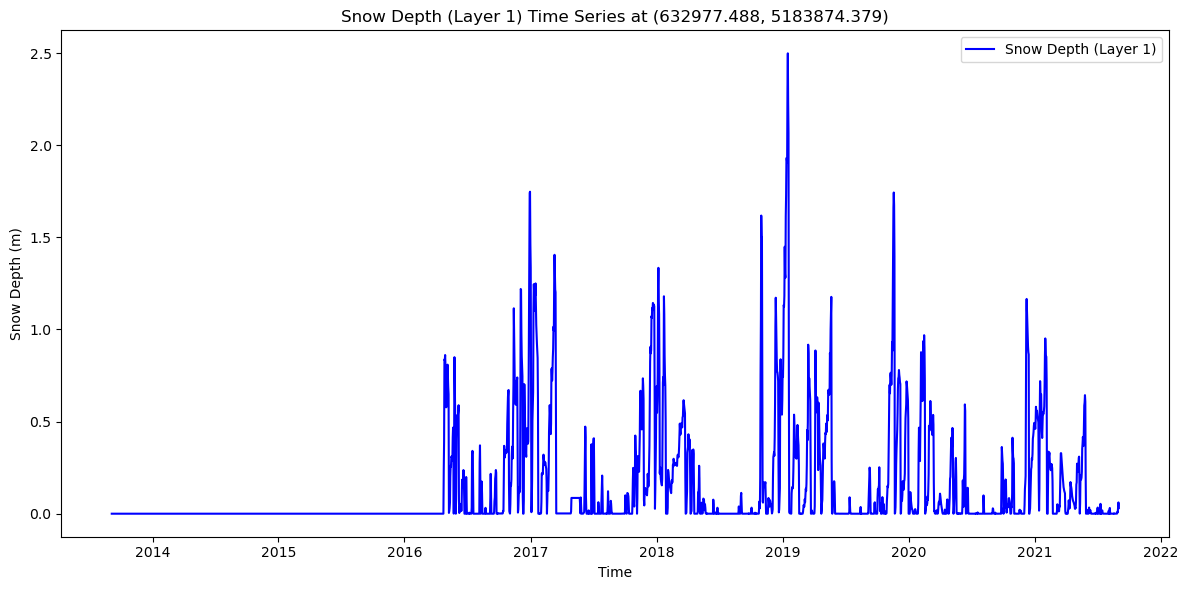

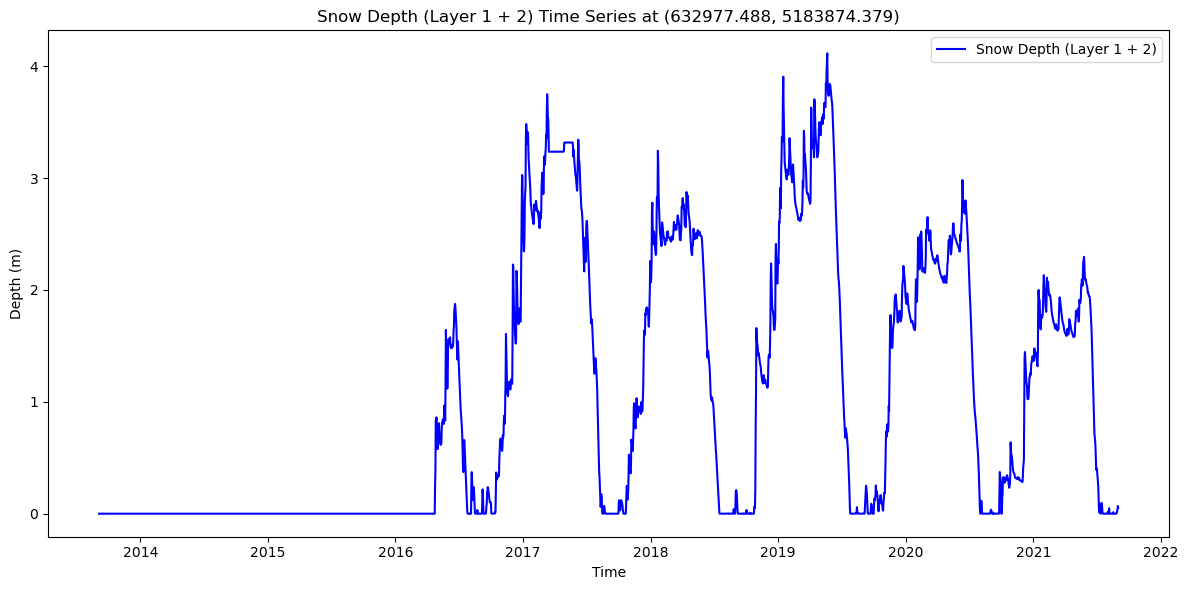

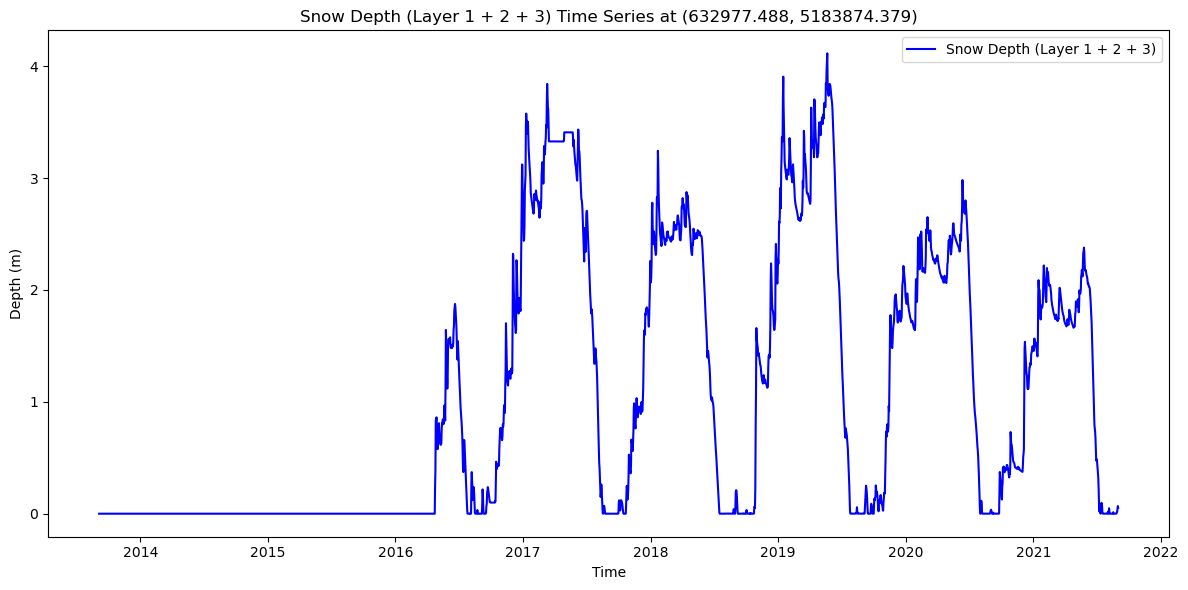

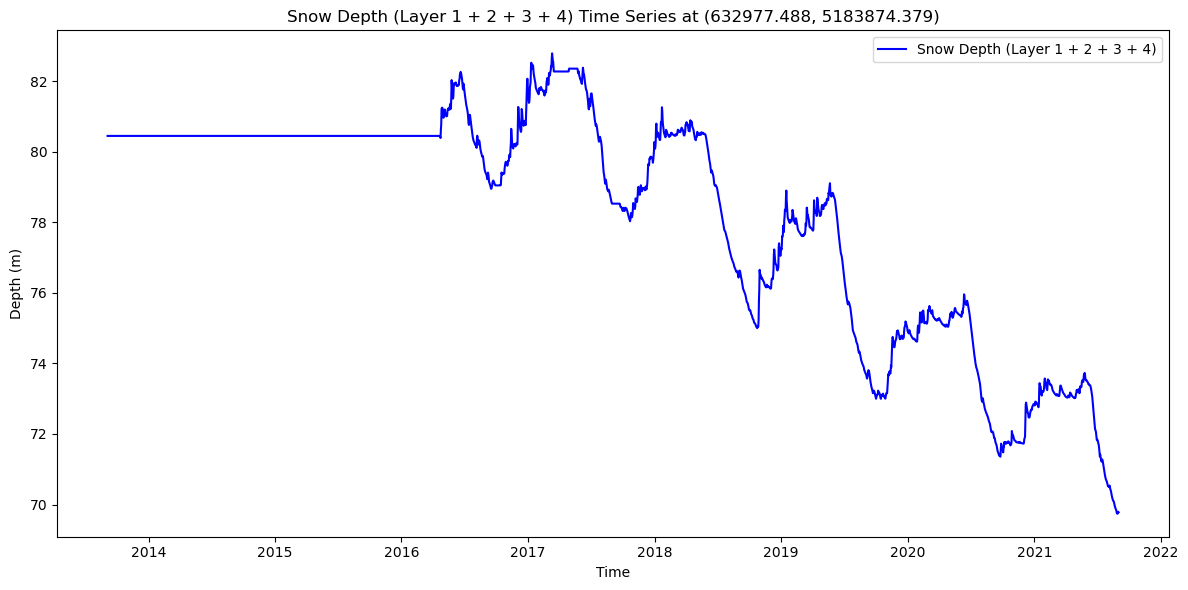

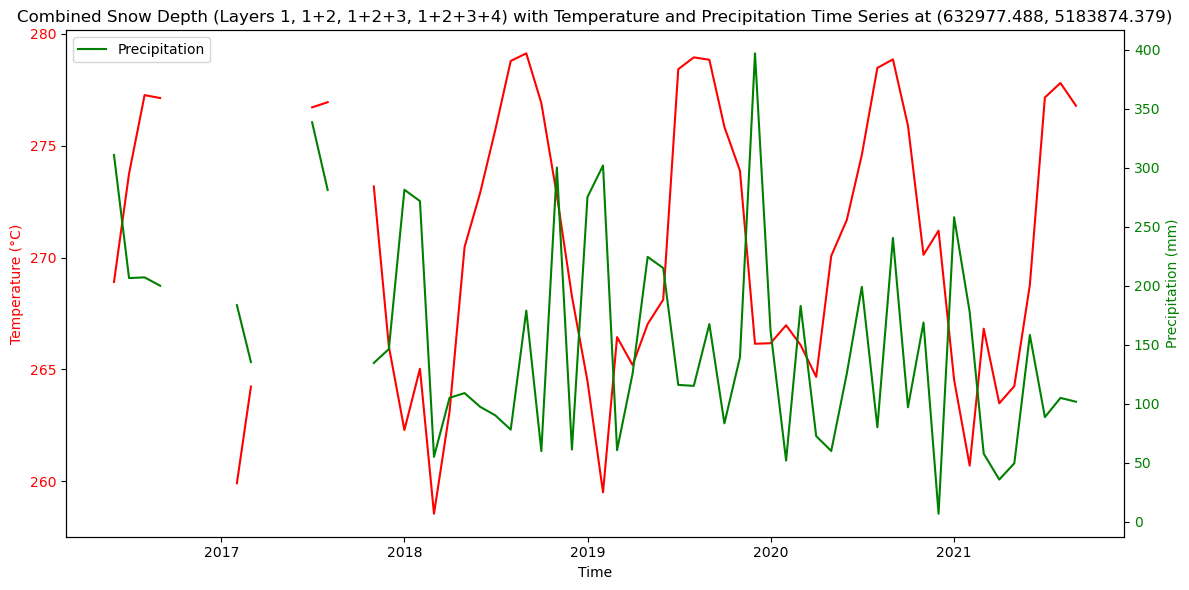

Nächstgelegene Koordinaten: x = 632977.488, y = 5183874.379


In [24]:
# Zeitreihe pro snow layer in Snow_thickness_day

# Definiere die Koordinaten der Zielstation (in UTM)
target_x = 632980.0 #AKKUMULATIONSGEBIET
target_y = 5183868.6
#target_x = 635364.38 #ZUNGE
#target_y = 5184887.14

# Extrahiere die x- und y-Koordinaten aus dem Dataset
x_coords = nc['x'].values
y_coords = nc['y'].values

# Berechne die Differenz zwischen den Zielkoordinaten und den Koordinaten im Dataset
dist_x = np.abs(x_coords - target_x)  # Differenz der x-Koordinaten
dist_y = np.abs(y_coords - target_y)  # Differenz der y-Koordinaten

# Erstelle ein Meshgrid für die Berechnung der Distanzmatrix
dist_x_grid, dist_y_grid = np.meshgrid(dist_x, dist_y)

# Berechne die Distanzmatrix
distances = np.sqrt(dist_x_grid**2 + dist_y_grid**2)

# Finde den Index des Punktes mit der kleinsten Distanz
min_index = np.unravel_index(np.argmin(distances), distances.shape)

# Extrahiere die x und y Koordinaten des nächstgelegenen Punktes
closest_x = x_coords[min_index[1]]
closest_y = y_coords[min_index[0]]

# Extrahiere die Schneetiefe für snow_layer=1 über den gesamten Zeitraum für diesen Punkt
snow_thickness_layer_1 = nc['snow_thickness_day'][:, 0, min_index[0], min_index[1]]  # Schneetiefe für Layer 1
snow_thickness_layer_1_2 = snow_thickness_layer_1 + nc['snow_thickness_day'][:, 1, min_index[0], min_index[1]]  # Schneetiefe für Layer 1+2
snow_thickness_layer_1_2_3 = snow_thickness_layer_1_2 + nc['snow_thickness_day'][:, 2, min_index[0], min_index[1]]  # Schneetiefe für Layer 1+2+3
snow_thickness_layer_1_2_3_4 = snow_thickness_layer_1_2_3 + nc['snow_thickness_day'][:, 3, min_index[0], min_index[1]]  # Schneetiefe für Layer 1+2+3+4

# Extrahiere die Temperaturdaten für den gleichen Zeitraum und Punkt
temperature_data = nc['temp_month'][:, min_index[0], min_index[1]]  # Angenommen, Temperaturdaten sind in 'temp_month'

# Extrahiere die Niederschlagsdaten für den gleichen Zeitraum und Punkt
precip_data = nc['precip_month'][:, min_index[0], min_index[1]]  # Angenommen, Niederschlagsdaten sind in 'precip_month'

# Erstelle den ersten Plot für Schneetiefe von snow_layer 1
plt.figure(figsize=(12, 6))
plt.plot(nc['time2'].values, snow_thickness_layer_1, label='Snow Depth (Layer 1)', color='blue')
plt.xlabel('Time')
plt.ylabel('Snow Depth (m)')
plt.title(f'Snow Depth (Layer 1) Time Series at ({closest_x}, {closest_y})')
plt.legend()
plt.tight_layout()
plt.show()

# Erstelle den zweiten Plot für Schneetiefe von snow_layer 1+2
plt.figure(figsize=(12, 6))
plt.plot(nc['time2'].values, snow_thickness_layer_1_2, label='Snow Depth (Layer 1 + 2)', color='blue')
plt.xlabel('Time')
plt.ylabel('Depth (m)')
plt.title(f'Snow Depth (Layer 1 + 2) Time Series at ({closest_x}, {closest_y})')
plt.legend()
plt.tight_layout()
plt.show()

# Erstelle den dritten Plot für Schneetiefe von snow_layer 1+2+3
plt.figure(figsize=(12, 6))
plt.plot(nc['time2'].values, snow_thickness_layer_1_2_3, label='Snow Depth (Layer 1 + 2 + 3)', color='blue')
plt.xlabel('Time')
plt.ylabel('Depth (m)')
plt.title(f'Snow Depth (Layer 1 + 2 + 3) Time Series at ({closest_x}, {closest_y})')
plt.legend()
plt.tight_layout()
plt.show()

# Erstelle den vierten Plot für Schneetiefe von snow_layer 1+2+3+4
plt.figure(figsize=(12, 6))
plt.plot(nc['time2'].values, snow_thickness_layer_1_2_3_4, label='Snow Depth (Layer 1 + 2 + 3 + 4)', color='blue')
plt.xlabel('Time')
plt.ylabel('Depth (m)')
plt.title(f'Snow Depth (Layer 1 + 2 + 3 + 4) Time Series at ({closest_x}, {closest_y})')
plt.legend()
plt.tight_layout()
plt.show()

# Plot für Temperatur und Niederschlag auf der rechten Achse
fig, ax1 = plt.subplots(figsize=(12, 6))

# Temperatur plotten
ax1.plot(nc['time1'].values, temperature_data, label='Temperature', color='red')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Niederschlag plotten
ax2 = ax1.twinx()
ax2.plot(nc['time1'].values, precip_data, label='Precipitation', color='green')
ax2.set_ylabel('Precipitation (mm)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Titel und Legende
plt.title(f'Combined Snow Depth (Layers 1, 1+2, 1+2+3, 1+2+3+4) with Temperature and Precipitation Time Series at ({closest_x}, {closest_y})')
fig.tight_layout()
plt.legend(loc='upper left')
plt.show()

# Ausgabe der Koordinaten und der Schneetiefe für den nächstgelegenen Punkt
print(f"Nächstgelegene Koordinaten: x = {closest_x}, y = {closest_y}")


AttributeError: 'str' object has no attribute 'strftime'

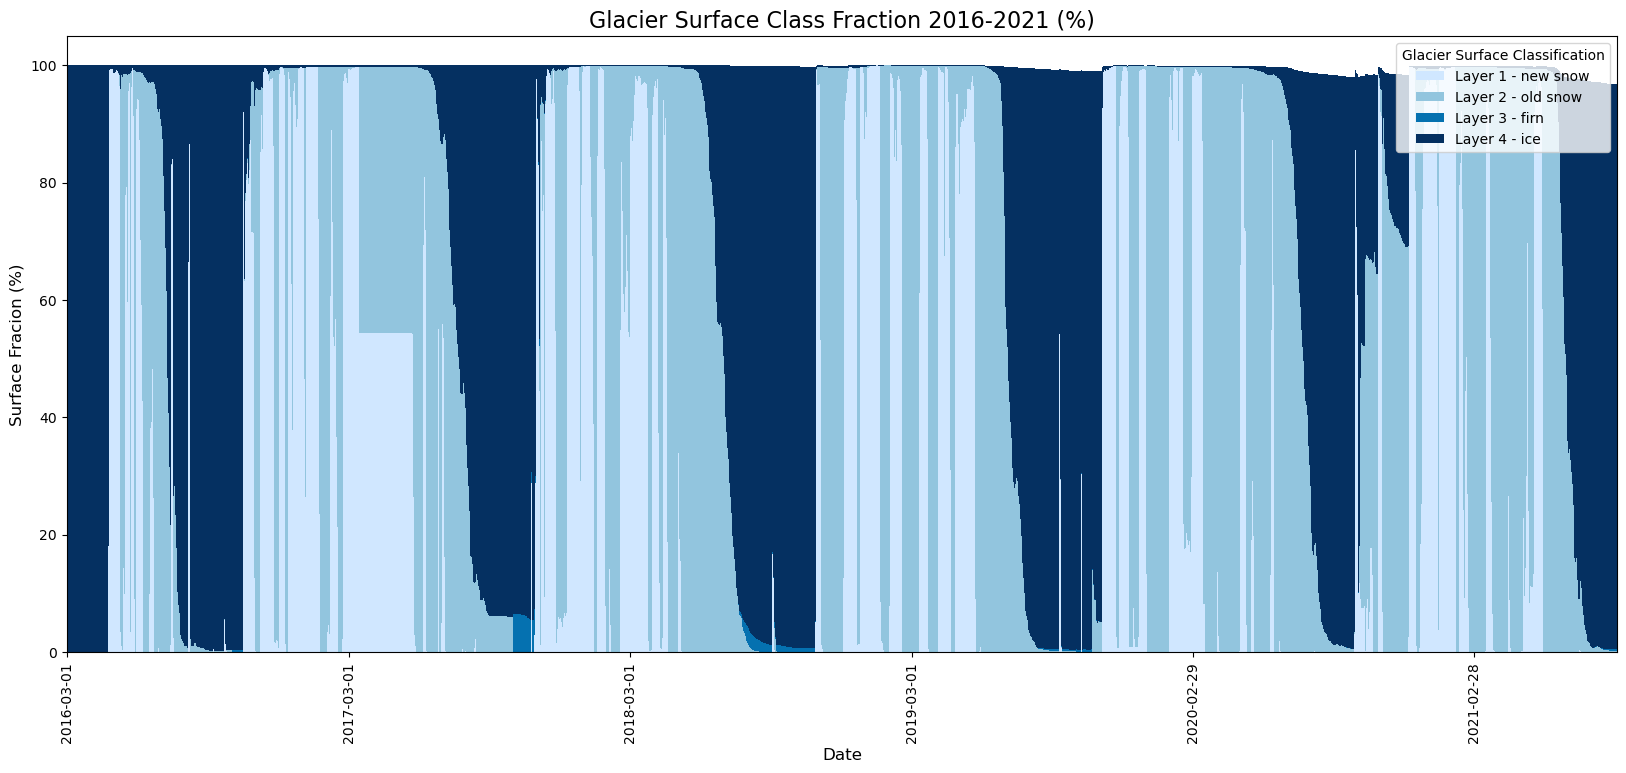

In [31]:
# Säulendiagramm zur Darstellung der Oberflächenanteile in %

# Pfad zur ASCII-Gletschermaske
mask_file = "C:/Users/csba2938/Documents/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"

# Gletschermaske einlesen
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Erstelle eine Liste mit allen Tagen im Juni 2019
dates_june_2019 = pd.date_range(start="2016-03-01", end="2021-08-31", freq='D')

# Initialisiere eine Liste zur Speicherung der Ergebnisse
results = []

# Iteriere über die Tage im Juni 2019
for date in dates_june_2019:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Initialisiere eine leere Matrix für die Oberflächenschichten
        surface_layer = np.zeros_like(glacier_mask, dtype=np.int32)

        # Iteriere **vorwärts** über die Schichten (Layer 1 -> Layer 4)
        for i in range(1, 5):
            layer_index = i - 1
            layer_data = snow_thickness.isel(snow_layer=layer_index).values

            # Wende die Gletschermaske an und maskiere Werte <= 0.2
            mask = (glacier_mask == 1) & (layer_data > 0.2)

            # Setze Werte nur für Pixel, die noch nicht belegt sind
            surface_layer[mask & (surface_layer == 0)] = i

        # Berechne die Flächenanteile der Layers
        total_surface_area = np.sum(glacier_mask == 1)  # Gesamtfläche der Gletschermaske
        layer_1_area = np.sum(surface_layer == 1)
        layer_2_area = np.sum(surface_layer == 2)
        layer_3_area = np.sum(surface_layer == 3)
        layer_4_area = np.sum(surface_layer == 4)

        # Prozentuale Anteile berechnen
        layer_1_share = (layer_1_area / total_surface_area) * 100 if total_surface_area > 0 else 0
        layer_2_share = (layer_2_area / total_surface_area) * 100 if total_surface_area > 0 else 0
        layer_3_share = (layer_3_area / total_surface_area) * 100 if total_surface_area > 0 else 0
        layer_4_share = (layer_4_area / total_surface_area) * 100 if total_surface_area > 0 else 0

        # Ergebnisse speichern
        results.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Layer 1 - new snow": layer_1_share,
            "Layer 2 - old snow": layer_2_share,
            "Layer 3 - firn": layer_3_share,
            "Layer 4 - ice": layer_4_share
        })

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")

# Konvertiere die Ergebnisse in einen DataFrame
layer_surface_shares = pd.DataFrame(results)

# Setze das Datum als Index
layer_surface_shares.set_index("Date", inplace=True)

# Plot: Gestapeltes Säulendiagramm
fig, ax = plt.subplots(figsize=(20, 8))  # Breite erhöht für mehr Platz

# Erstelle das gestapelte Säulendiagramm
layer_surface_shares.plot(kind="bar", stacked=True, ax=ax, color=["#d0e7ff", "#92c5de", "#0571b0", "#053061"], width=1)

# Diagramm anpassen
ax.set_title("Glacier Surface Class Fraction 2016-2021 (%)", fontsize=16)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Surface Fracion (%)", fontsize=12)
ax.legend(title="Glacier Surface Classification", loc="upper right")

# Setze die xticks nur auf jedes 366ste Datum (normalerweise für Schaltjahre)
xticks_indices = range(0, len(layer_surface_shares.index), 365)
ax.set_xticks(xticks_indices)

# Anzeige der Beschriftungen für die xticks (nur jedes 366ste Datum)
# Verwenden von map und strftime für die x-Achsen-Beschriftungen
xtick_labels = list(map(lambda x: x.strftime("%Y-%m-%d"), layer_surface_shares.index[xticks_indices]))
ax.set_xticklabels(xtick_labels, rotation=45, ha="right")

# Diagramm speichern und anzeigen
try:
    plt.tight_layout()
    plt.savefig("Surface Layer Shares 2016-2021.png")
    plt.show()
except Exception as e:
    print(f"Fehler beim Speichern oder Anzeigen des Plots: {e}")

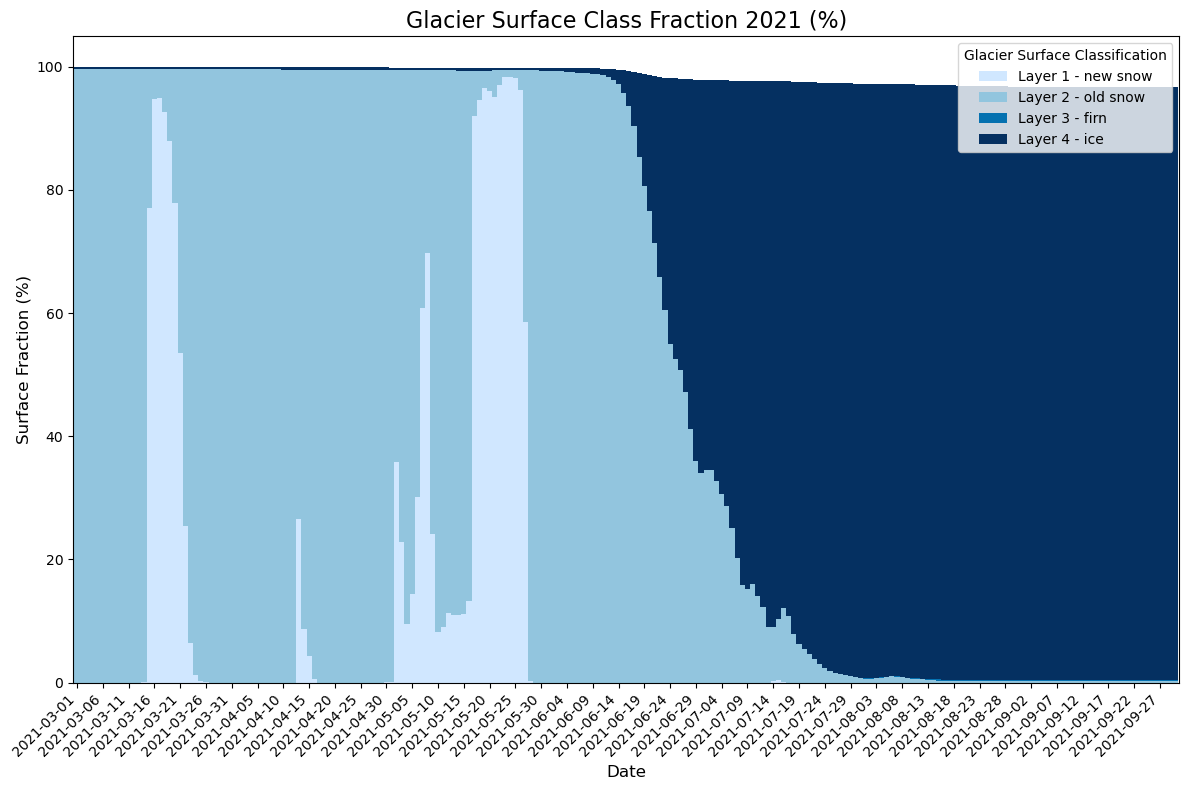

In [37]:
# Säulen pro Melt Season

# Pfad zur ASCII-Gletschermaske
mask_file = "C:/Users/csba2938/Documents/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"

# Gletschermaske einlesen
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Erstelle eine Liste mit allen Tagen im Juni 2019
dates_june_2019 = pd.date_range(start="2021-03-01", end="2021-09-30", freq='D')

# Initialisiere eine Liste zur Speicherung der Ergebnisse
results = []

# Iteriere über die Tage im Juni 2019
for date in dates_june_2019:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Initialisiere eine leere Matrix für die Oberflächenschichten
        surface_layer = np.zeros_like(glacier_mask, dtype=np.int32)

        # Iteriere **vorwärts** über die Schichten (Layer 1 -> Layer 4)
        for i in range(1, 5):
            layer_index = i - 1
            layer_data = snow_thickness.isel(snow_layer=layer_index).values

            # Wende die Gletschermaske an und maskiere Werte <= 0.2
            mask = (glacier_mask == 1) & (layer_data > 0.2)

            # Setze Werte nur für Pixel, die noch nicht belegt sind
            surface_layer[mask & (surface_layer == 0)] = i

        # Berechne die Flächenanteile der Layers
        total_surface_area = np.sum(glacier_mask == 1)  # Gesamtfläche der Gletschermaske
        layer_1_area = np.sum(surface_layer == 1)
        layer_2_area = np.sum(surface_layer == 2)
        layer_3_area = np.sum(surface_layer == 3)
        layer_4_area = np.sum(surface_layer == 4)

        # Prozentuale Anteile berechnen
        layer_1_share = (layer_1_area / total_surface_area) * 100 if total_surface_area > 0 else 0
        layer_2_share = (layer_2_area / total_surface_area) * 100 if total_surface_area > 0 else 0
        layer_3_share = (layer_3_area / total_surface_area) * 100 if total_surface_area > 0 else 0
        layer_4_share = (layer_4_area / total_surface_area) * 100 if total_surface_area > 0 else 0

        # Ergebnisse speichern
        results.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Layer 1 - new snow": layer_1_share,
            "Layer 2 - old snow": layer_2_share,
            "Layer 3 - firn": layer_3_share,
            "Layer 4 - ice": layer_4_share
        })

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")
# Konvertiere die Ergebnisse in einen DataFrame
layer_surface_shares = pd.DataFrame(results)

# Setze das Datum als Index
layer_surface_shares.set_index("Date", inplace=True)

# Plot: Gestapeltes Säulendiagramm
fig, ax = plt.subplots(figsize=(12, 8))
layer_surface_shares.plot(kind="bar", stacked=True, ax=ax, color=["#d0e7ff", "#92c5de", "#0571b0", "#053061"], width=1)

# Diagramm anpassen
ax.set_title("Glacier Surface Class Fraction 2021 (%)", fontsize=16)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Surface Fraction (%)", fontsize=12)
ax.legend(title="Glacier Surface Classification", loc="upper right")
ax.set_xticks(range(0, len(layer_surface_shares.index), 5))  # Zeige jeden 5. Tag
ax.set_xticklabels(layer_surface_shares.index[::5], rotation=45, ha="right")

plt.tight_layout()
plt.savefig("Glacier Surface Class Fraction 2021.png")
plt.show()

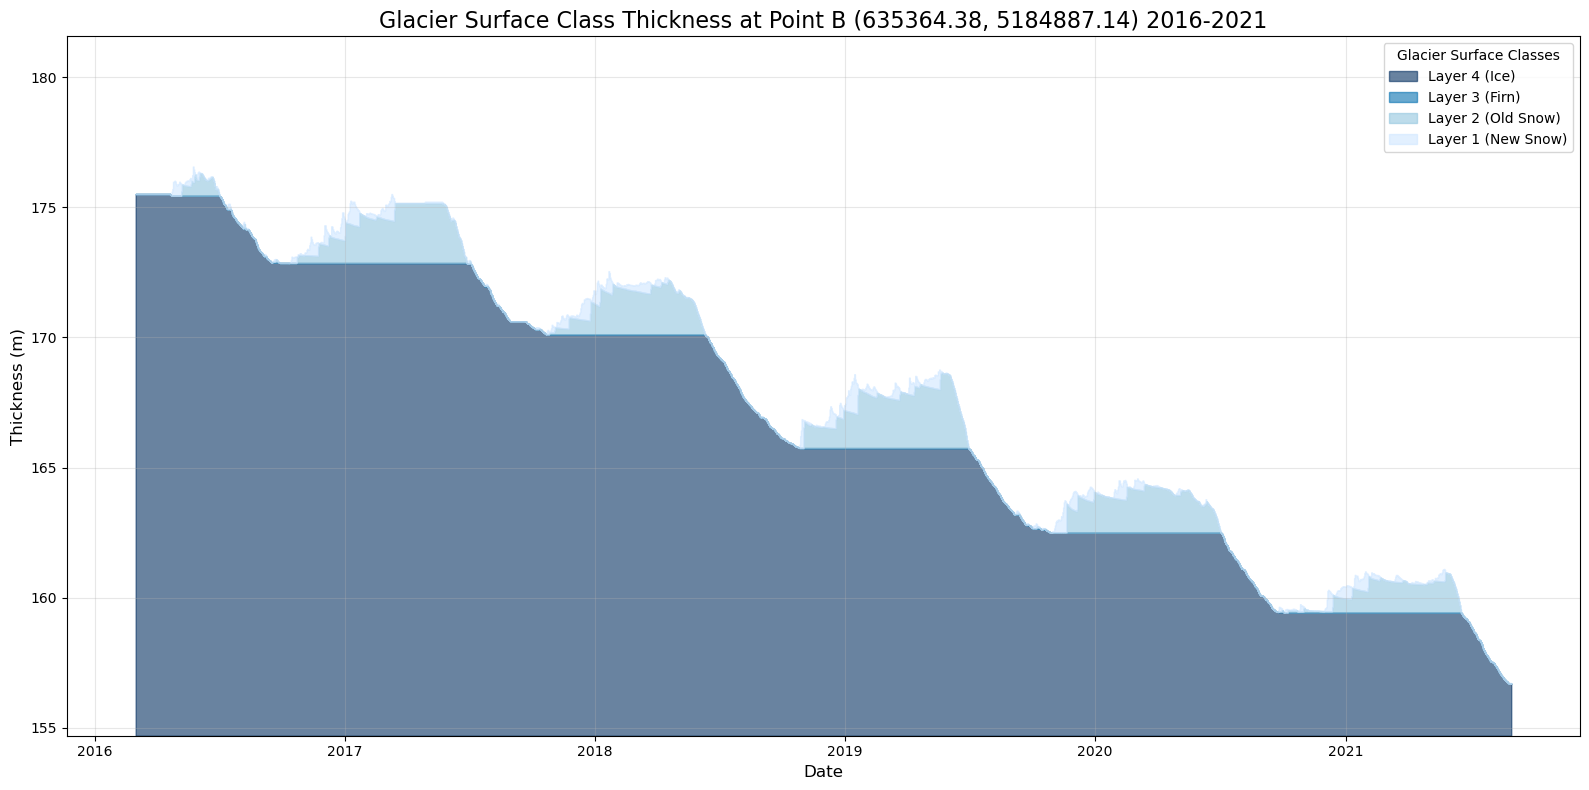

In [28]:
# Querschnitt über Melt Season für einen Punkt

# Zielkoordinaten (UTM)
#target_x = 632980.0
#target_y = 5183868.6
target_x = 635364.38
target_y = 5184887.14
# Extrahiere die x- und y-Koordinaten aus dem Dataset
x_coords = nc['x'].values
y_coords = nc['y'].values

# Berechne die Differenz zwischen den Zielkoordinaten und den Koordinaten im Dataset
dist_x = np.abs(x_coords - target_x)
dist_y = np.abs(y_coords - target_y)

# Erstelle ein Meshgrid für die Berechnung der Distanzmatrix
dist_x_grid, dist_y_grid = np.meshgrid(dist_x, dist_y)

# Berechne die Distanzmatrix
distances = np.sqrt(dist_x_grid**2 + dist_y_grid**2)

# Finde den Index des Punktes mit der kleinsten Distanz
min_index = np.unravel_index(np.argmin(distances), distances.shape)
x_index = min_index[1]
y_index = min_index[0]

# Zielzeitraum: Melt Season
start_date = "2016-03-01"
end_date = "2021-08-31"
dates = pd.date_range(start=start_date, end=end_date, freq="D")

# Initialisiere Listen zur Speicherung der Layer-Summen
layer_1_sum = []
layer_2_sum = []
layer_3_sum = []
layer_4_sum = []

# Iteriere über die Tage der Melt Season
for date in dates:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Extrahiere Werte für alle Layers an der Zielposition
        layer_1 = nc['snow_thickness_day'].sel(time2=target_date, snow_layer=0).isel(x=x_index, y=y_index).values
        layer_2 = nc['snow_thickness_day'].sel(time2=target_date, snow_layer=1).isel(x=x_index, y=y_index).values
        layer_3 = nc['snow_thickness_day'].sel(time2=target_date, snow_layer=2).isel(x=x_index, y=y_index).values
        layer_4 = nc['snow_thickness_day'].sel(time2=target_date, snow_layer=3).isel(x=x_index, y=y_index).values

        # Berechne die aufsummierten Werte
        sum_4 = layer_4
        sum_3 = layer_3 + layer_4
        sum_2 = layer_2 + layer_3 + layer_4
        sum_1 = layer_1 + layer_2 + layer_3 + layer_4

        # Werte speichern
        layer_1_sum.append(sum_1)
        layer_2_sum.append(sum_2)
        layer_3_sum.append(sum_3)
        layer_4_sum.append(sum_4)

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")
        layer_1_sum.append(np.nan)
        layer_2_sum.append(np.nan)
        layer_3_sum.append(np.nan)
        layer_4_sum.append(np.nan)

# Y-Achsen-Start berechnen (10 m über dem ersten Layer-4-Wert)
y_min = max(0, min(layer_4_sum)) - 2

# Plot der Zeitreihe
plt.figure(figsize=(16, 8))

# Bereichsfarben (tiefste Schicht zuerst)
plt.fill_between(dates, y_min, layer_4_sum, color="#053061", label="Layer 4 (Ice)", step="mid", alpha=0.6)
plt.fill_between(dates, layer_4_sum, layer_3_sum, color="#0571b0", label="Layer 3 (Firn)", step="mid", alpha=0.6)
plt.fill_between(dates, layer_3_sum, layer_2_sum, color="#92c5de", label="Layer 2 (Old Snow)", step="mid", alpha=0.6)
plt.fill_between(dates, layer_2_sum, layer_1_sum, color="#d0e7ff", label="Layer 1 (New Snow)", step="mid", alpha=0.6)

# Plot-Anpassungen
plt.title(f"Glacier Surface Class Thickness at Point B ({target_x}, {target_y}) 2016-2021", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Thickness (m)", fontsize=12)
plt.ylim(y_min, max(layer_1_sum) + 5)
plt.legend(title="Glacier Surface Classes", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Abbildung speichern und anzeigen
plt.savefig("Layer Transect HEF 2016-21.png")
plt.show()



In [20]:
# Eisverlust
# Volumensänderung Layer 3 in definiertem Zeitraum

import numpy as np
import pandas as pd
import xarray as xr
import rasterio

# -------------------------------
# 1) Parameter: Pfade & Gletschermaske
# -------------------------------
input_nc_file = "C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/results_all_sa/output_grids.nc" # Pfad zur NetCDF-Datei
mask_file = "C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc" # Pfad zur Gletschermaske im ASC-Format
mask_file = "C:/Users/anne_/Desktop/Anne/glacier_selection_aoi.tif"
output_km3 = "output_volume_loss_km3.txt"  # Ausgabe des Volumenverlusts in km³

# Zeitraum für die Berechnung (Start und Ende im Format 'YYYY-MM-DD')
start_date = "2020-05-01"
end_date = "2020-08-30"


# -------------------------------
# 2) Gletschermaske einlesen
# -------------------------------
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Gletschermaske einlesen (1: Gletscher, 0: außerhalb des Gletschers)

# -------------------------------
# 3) NetCDF-Daten einlesen
# -------------------------------
nc = xr.open_dataset(input_nc_file)

# Extrahiere die snow_thickness_day-Daten für die Gletscher
snow_thickness_day = nc['snow_thickness_day']

# -------------------------------
# 4) Zeitraum einlesen und die Indizes für den Zeitraum finden
# -------------------------------
# Umwandlung des Zeitrahmens in DatetimeIndex (nur Datum ohne Zeit)
time_index = pd.to_datetime(snow_thickness_day.coords['time2'].values).date

# Umwandlung der Start- und Enddaten in Datetime-Objekte
start_date_obj = pd.to_datetime(start_date).date()
end_date_obj = pd.to_datetime(end_date).date()

# Indizes für den angegebenen Zeitraum finden
start_idx = np.where(time_index == start_date_obj)[0][0]
end_idx = np.where(time_index == end_date_obj)[0][0]

# Auswahl der Daten für den Zeitraum
selected_data = snow_thickness_day.sel(time2=slice(start_date, end_date))

# -------------------------------
# 5) Volumenverlustberechnung (nur für Layer 3 - Eis)
# -------------------------------
# Layer 3 entspricht dem Eis (unterster Layer, snow_layer = 3)
ice_layer_data = selected_data.sel(snow_layer=3)  # Wähle nur Layer 3 (Eis)

# Umrechnung der Dicke (in Metern) in Volumenverlust: Fläche * Dicke
# Fläche pro Pixel (bei 50m Auflösung, also 50m * 50m)
pixel_area = 50 * 50  # in Quadratmetern
total_area = np.sum(glacier_mask == 1)  # Gesamtfläche der Gletschermaske

# Berechnung des Volumenverlusts pro Tag (Volumen = Fläche * Änderung der Dicke)
# Volumenverlust in m³
volume_loss_m3 = np.sum(np.diff(ice_layer_data.values, axis=0) * pixel_area * glacier_mask[None, :, :], axis=(1, 2))

# Gesamtvolumenverlust in m³ und km³
total_volume_loss_m3 = np.sum(volume_loss_m3)
total_volume_loss_km3 = total_volume_loss_m3 / 1e9  # Umrechnung in km³

# -------------------------------
# 6) Ausgabe der Ergebnisse
# -------------------------------
with open(output_km3, 'w') as f:
    f.write(f"Total volume loss (in m³): {total_volume_loss_m3:.2f} m³\n")
    f.write(f"Total volume loss (in km³): {total_volume_loss_km3:.6f} km³\n")

print(f"Total volume loss: {total_volume_loss_m3:.2f} m³")
print(f"Total volume loss: {total_volume_loss_km3:.6f} km³")




Total volume loss: -152790768.00 m³
Total volume loss: -0.152791 km³


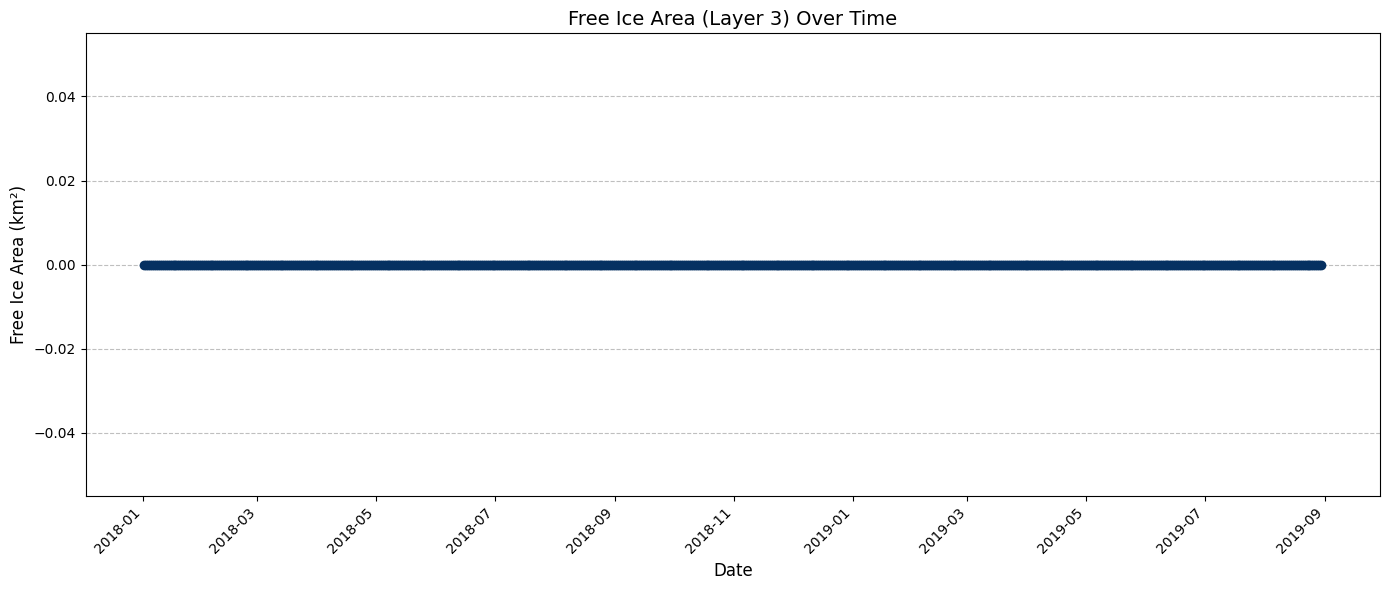

In [32]:
# Berechnen der freien Eisfläche pro Zeitschritt
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import rasterio

# -------------------------------
# 1) Parameter: Pfade & Dateien
# -------------------------------
output_path = "free_ice_area_plot.png"  # Speicherpfad für die Grafik
mask_file = "C:/Users/anne_/Desktop/Anne/glacier_selection_aoi.tif"
start_date = "2018-01-01"
end_date = "2019-08-30"


# -------------------------------
# 2) NetCDF-Daten einlesen
# -------------------------------
nc = xr.open_dataset(input_nc_file)

# Extrahiere die snow_thickness_day-Daten
snow_thickness_day = nc['snow_thickness_day']

# -------------------------------
# 3) Gletschermaske einlesen
# -------------------------------
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Gletschermaske lesen
    glacier_mask = (glacier_mask == 1).astype(np.float32)  # Umwandlung in binäre Maske (1 für Gletscher, 0 für außerhalb)

# -------------------------------
# 4) Auswahl von Layer 3 (Eis) und Zeit
# -------------------------------
# Layer 3 entspricht dem Eis (snow_layer = 3)
ice_layer_data = snow_thickness_day.sel(snow_layer=3)

# Zeitreihe (time2) extrahieren und sicherstellen, dass sie im richtigen Format vorliegt
time_index = pd.to_datetime(ice_layer_data.coords['time2'].values)

# Umwandlung der Zeit in das gewünschte Start- und Enddatum
time_mask = (time_index >= pd.to_datetime(start_date)) & (time_index <= pd.to_datetime(end_date))

# Auswahl der Daten für den angegebenen Zeitraum
ice_layer_data_filtered = ice_layer_data.sel(time2=time_index[time_mask])

# -------------------------------
# 5) Berechnung der freien Eisfläche
# -------------------------------
# Nur den Bereich innerhalb der Gletschermaske berücksichtigen
# Bedingungen: Snow Layer 0, 1, 2 == 0 und Layer 3 > 0
free_ice_area = []

for t in range(len(ice_layer_data_filtered.time2)):
    # Daten für den aktuellen Zeitschritt
    layer_0 = snow_thickness_day.sel(snow_layer=0).isel(time2=t)  # Neuschnee
    layer_1 = snow_thickness_day.sel(snow_layer=1).isel(time2=t)  # Altschnee
    layer_2 = snow_thickness_day.sel(snow_layer=2).isel(time2=t)  # Firn
    layer_3 = ice_layer_data_filtered.isel(time2=t)  # Eis

    # Bedingung: Free ice -> Layer 0, 1, 2 sind 0 und Layer 3 > 0
    free_ice_mask = (layer_0 == 0) & (layer_1 == 0) & (layer_2 == 0) & (layer_3 > 0) & (glacier_mask == 755530)
    #free_ice_mask = (layer_0 < 0.1) & (layer_1 < 0.1) & (layer_2 < 0.1) & (layer_3 > 0) & (glacier_mask == 1)

    # Fläche berechnen: Anzahl der Pixel in der Maske (d.h. freie Eisfläche)
    free_ice_area_pixels = np.sum(free_ice_mask)
    # Umrechnung der Pixelzahl in km²: 1 Pixel entspricht 50m x 50m (also 0.0025 km²)
    free_ice_area_km2 = free_ice_area_pixels * 0.0025

    # Die Fläche für diesen Zeitschritt hinzufügen
    free_ice_area.append(free_ice_area_km2)

# -------------------------------
# 6) Plot der freien Eisfläche pro Tag
# -------------------------------
plt.figure(figsize=(14, 6))
plt.plot(time_index[time_mask], free_ice_area, color="#053061", linestyle='-', marker='o')

# Diagramm-Anpassungen
plt.xlabel("Date", fontsize=12)
plt.ylabel("Free Ice Area (km²)", fontsize=12)
plt.title("Free Ice Area (Layer 3) Over Time", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', color='gray', alpha=0.5)

# Diagramm speichern
plt.tight_layout()
plt.savefig(output_path, dpi=300)

# Optional: Diagramm anzeigen
plt.show()


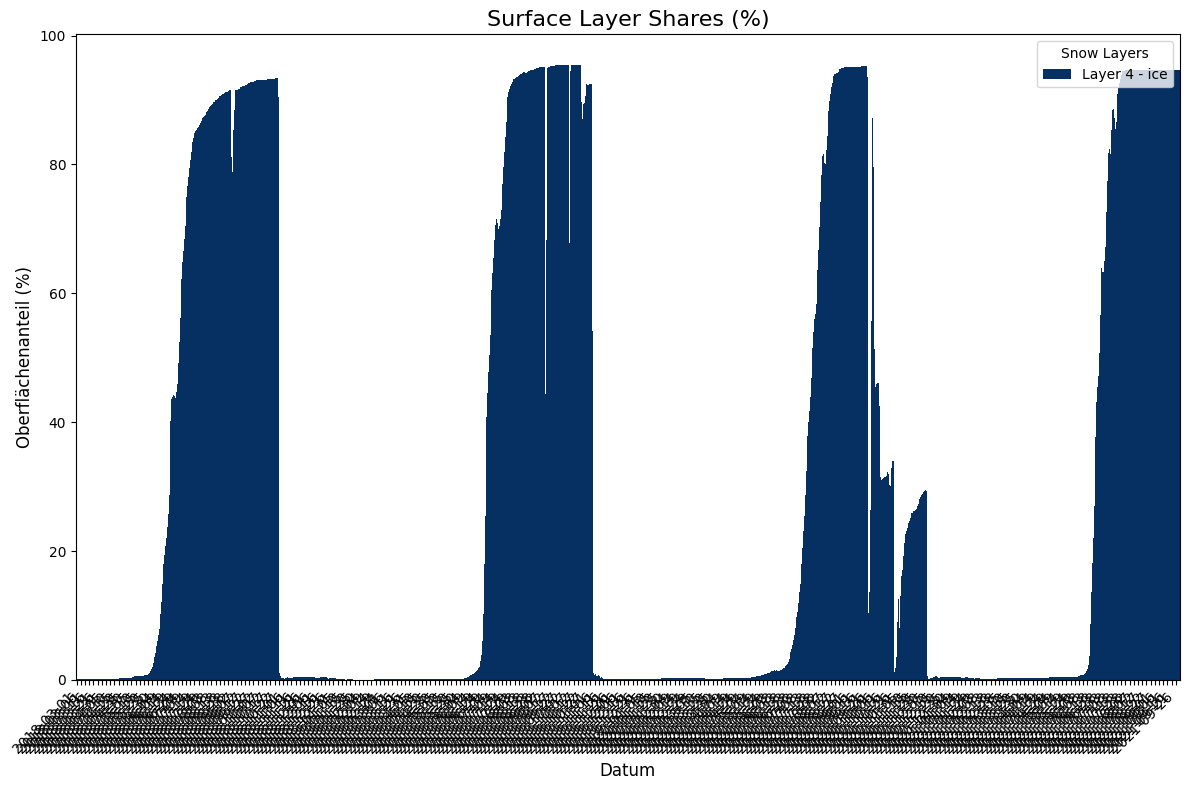

In [46]:

# Pfad zur ASCII-Gletschermaske
mask_file = "C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"

# Gletschermaske einlesen
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Erstelle eine Liste mit allen Tagen im Juni 2019
dates_june_2019 = pd.date_range(start="2018-03-01", end="2021-09-30", freq='D')

# Initialisiere eine Liste zur Speicherung der Ergebnisse
results = []

# Iteriere über die Tage im Juni 2019
for date in dates_june_2019:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Initialisiere eine leere Matrix für die Oberflächenschichten
        surface_layer = np.zeros_like(glacier_mask, dtype=np.int32)

        # Iteriere **vorwärts** über die Schichten (Layer 1 -> Layer 4)
        for i in range(1, 5):
            layer_index = i - 1
            layer_data = snow_thickness.isel(snow_layer=layer_index).values

            # Wende die Gletschermaske an und maskiere Werte <= 0.2
            mask = (glacier_mask == 1) & (layer_data > 0.2)

            # Setze Werte nur für Pixel, die noch nicht belegt sind
            surface_layer[mask & (surface_layer == 0)] = i

        # Berechne die Flächenanteile der Layers
        total_surface_area = np.sum(glacier_mask == 1)  # Gesamtfläche der Gletschermaske
        layer_1_area = np.sum(surface_layer == 1)
        layer_2_area = np.sum(surface_layer == 2)
        layer_3_area = np.sum(surface_layer == 3)
        layer_4_area = np.sum(surface_layer == 4)

        # Prozentuale Anteile berechnen
        layer_1_share = (layer_1_area / total_surface_area) * 100 if total_surface_area > 0 else 0
        layer_2_share = (layer_2_area / total_surface_area) * 100 if total_surface_area > 0 else 0
        layer_3_share = (layer_3_area / total_surface_area) * 100 if total_surface_area > 0 else 0
        layer_4_share = (layer_4_area / total_surface_area) * 100 if total_surface_area > 0 else 0

        # Ergebnisse speichern
        results.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Layer 4 - ice": layer_4_share
        })

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")
# Konvertiere die Ergebnisse in einen DataFrame
layer_surface_shares = pd.DataFrame(results)

# Setze das Datum als Index
layer_surface_shares.set_index("Date", inplace=True)

# Plot: Gestapeltes Säulendiagramm
fig, ax = plt.subplots(figsize=(12, 8))
layer_surface_shares.plot(kind="bar", stacked=True, ax=ax, color=["#053061"], width=1)

# Diagramm anpassen
ax.set_title("Surface Layer Shares (%)", fontsize=16)
ax.set_xlabel("Datum", fontsize=12)
ax.set_ylabel("Oberflächenanteil (%)", fontsize=12)
ax.legend(title="Snow Layers", loc="upper right")
ax.set_xticks(range(0, len(layer_surface_shares.index), 5))  # Zeige jeden 5. Tag
ax.set_xticklabels(layer_surface_shares.index[::5], rotation=45, ha="right")

plt.tight_layout()
plt.savefig("Surface Layer Shares.png")
plt.show()


AttributeError: 'str' object has no attribute 'strftime'

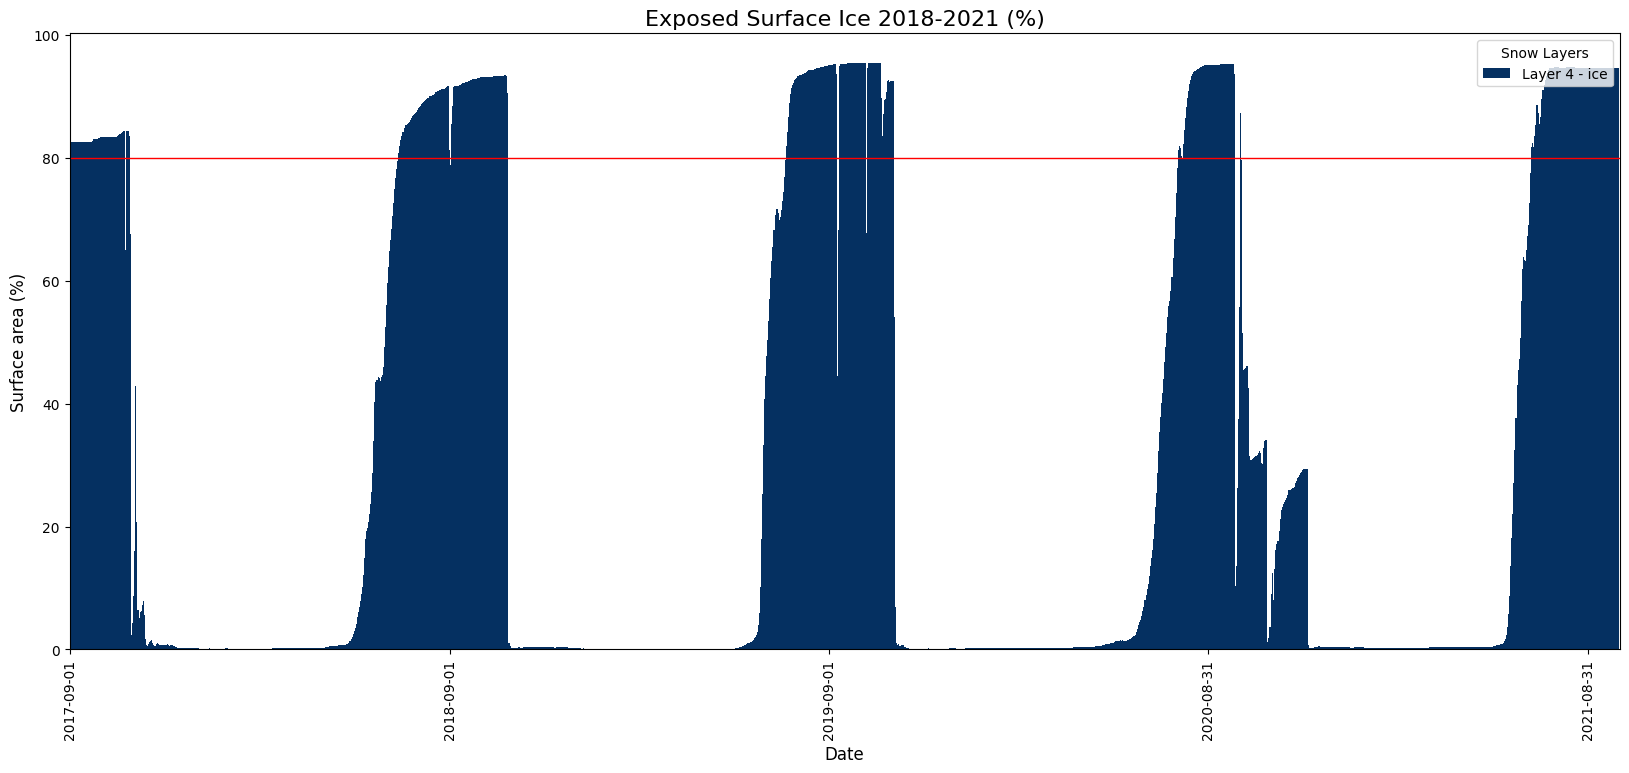

In [51]:
# Säulendiagramm zur Darstellung der Oberflächenanteile in %

# Pfad zur ASCII-Gletschermaske
mask_file = "C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"

# Gletschermaske einlesen
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Erstelle eine Liste mit allen Tagen im Juni 2019
dates_june_2019 = pd.date_range(start="2018-05-01", end="2020-09-30", freq='D')

# Initialisiere eine Liste zur Speicherung der Ergebnisse
results = []

# Iteriere über die Tage im Juni 2019
for date in dates_june_2019:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Initialisiere eine leere Matrix für die Oberflächenschichten
        surface_layer = np.zeros_like(glacier_mask, dtype=np.int32)

        # Iteriere **vorwärts** über die Schichten (Layer 1 -> Layer 4)
        for i in range(1, 5):
            layer_index = i - 1
            layer_data = snow_thickness.isel(snow_layer=layer_index).values

            # Wende die Gletschermaske an und maskiere Werte <= 0.2
            mask = (glacier_mask == 1) & (layer_data > 0.2)

            # Setze Werte nur für Pixel, die noch nicht belegt sind
            surface_layer[mask & (surface_layer == 0)] = i

        # Berechne die Flächenanteile der Layers
        total_surface_area = np.sum(glacier_mask == 1)  # Gesamtfläche der Gletschermaske
        layer_1_area = np.sum(surface_layer == 1)
        layer_2_area = np.sum(surface_layer == 2)
        layer_3_area = np.sum(surface_layer == 3)
        layer_4_area = np.sum(surface_layer == 4)

        # Prozentuale Anteile berechnen
        layer_1_share = (layer_1_area / total_surface_area) * 100 if total_surface_area > 0 else 0
        layer_2_share = (layer_2_area / total_surface_area) * 100 if total_surface_area > 0 else 0
        layer_3_share = (layer_3_area / total_surface_area) * 100 if total_surface_area > 0 else 0
        layer_4_share = (layer_4_area / total_surface_area) * 100 if total_surface_area > 0 else 0

        # Ergebnisse speichern
        results.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Layer 4 - ice": layer_4_share
        })

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")

# Konvertiere die Ergebnisse in einen DataFrame
layer_surface_shares = pd.DataFrame(results)

# Setze das Datum als Index
layer_surface_shares.set_index("Date", inplace=True)

# Plot: Gestapeltes Säulendiagramm
fig, ax = plt.subplots(figsize=(20, 8))  # Breite erhöht für mehr Platz

# Erstelle das gestapelte Säulendiagramm
layer_surface_shares.plot(kind="bar", stacked=True, ax=ax, color=["#053061"], width=1)

# Füge eine horizontale Linie bei 80% auf der y-Achse hinzu
ax.axhline(y=80, color='red', linestyle='-', linewidth=1)

# Diagramm anpassen
ax.set_title("Exposed Surface Ice 2018-2021 (%)", fontsize=16)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Surface area (%)", fontsize=12)
ax.legend(title="Snow Layers", loc="upper right")

# Setze die xticks nur auf jedes 366ste Datum (normalerweise für Schaltjahre)
xticks_indices = range(0, len(layer_surface_shares.index), 365)
ax.set_xticks(xticks_indices)

# Anzeige der Beschriftungen für die xticks (nur jedes 366ste Datum)
# Verwenden von map und strftime für die x-Achsen-Beschriftungen
xtick_labels = list(map(lambda x: x.strftime("%Y-%m-%d"), layer_surface_shares.index[xticks_indices]))
ax.set_xticklabels(xtick_labels, rotation=45, ha="right")

# Diagramm speichern und anzeigen
try:
    plt.tight_layout()
    plt.savefig("Exposed Surface Ice.png")
    plt.show()
except Exception as e:
    print(f"Fehler beim Speichern oder Anzeigen des Plots: {e}")

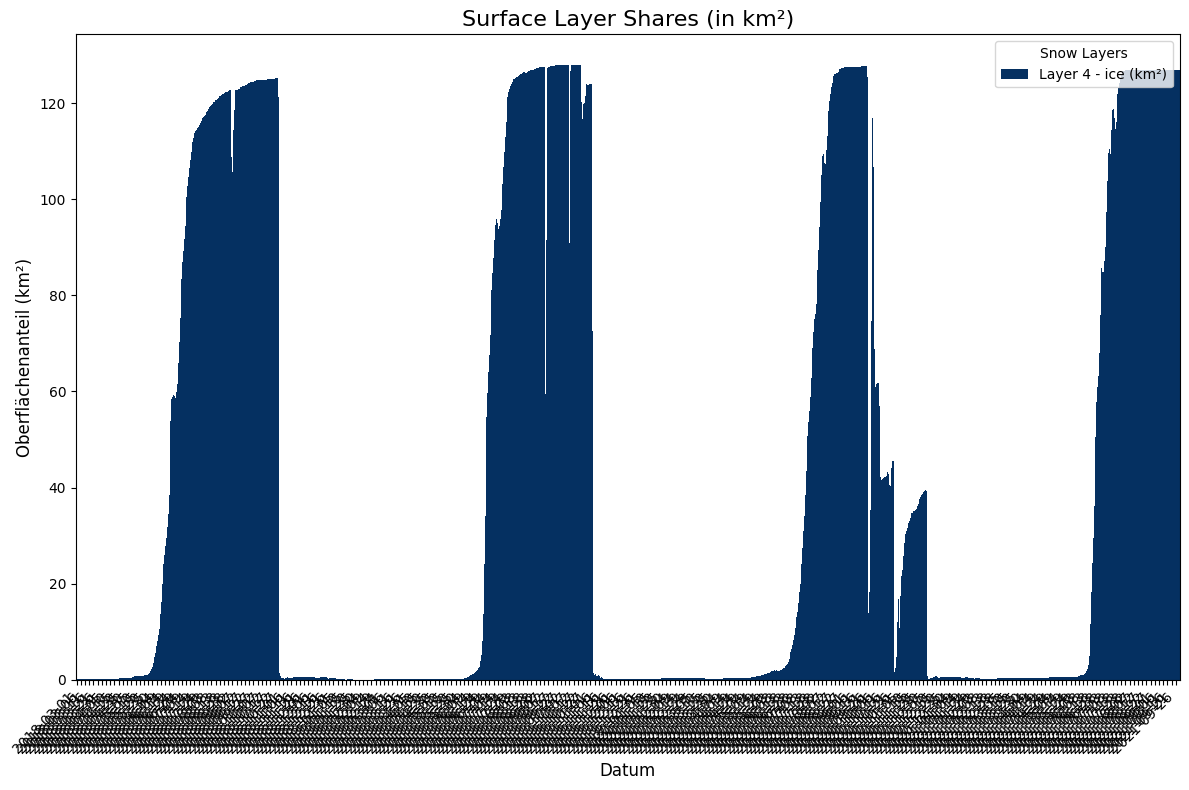

In [45]:
# Pfad zur ASCII-Gletschermaske
mask_file = "C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"

# Gletschermaske einlesen
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Erstelle eine Liste mit allen Tagen im angegebenen Zeitraum
dates_june_2019 = pd.date_range(start="2018-03-01", end="2021-09-30", freq='D')

# Initialisiere eine Liste zur Speicherung der Ergebnisse
results = []

# Iteriere über die Tage im angegebenen Zeitraum
for date in dates_june_2019:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Initialisiere eine leere Matrix für die Oberflächenschichten
        surface_layer = np.zeros_like(glacier_mask, dtype=np.int32)

        # Iteriere **vorwärts** über die Schichten (Layer 1 -> Layer 4)
        for i in range(1, 5):
            layer_index = i - 1
            layer_data = snow_thickness.isel(snow_layer=layer_index).values

            # Wende die Gletschermaske an und maskiere Werte <= 0.2
            mask = (glacier_mask == 1) & (layer_data > 0.2)

            # Setze Werte nur für Pixel, die noch nicht belegt sind
            surface_layer[mask & (surface_layer == 0)] = i

        # Berechne die Fläche der einzelnen Layer
        total_surface_area = np.sum(glacier_mask == 1)  # Gesamtfläche der Gletschermaske
        layer_4_area = np.sum(surface_layer == 4)

        # Fläche in Quadratkilometern berechnen
        # Jeder Pixel entspricht 0.0025 km² (50m x 50m)
        layer_4_area_km2 = (layer_4_area * 0.0025)

        # Ergebnisse speichern
        results.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Layer 4 - ice (km²)": layer_4_area_km2
        })

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")

# Konvertiere die Ergebnisse in einen DataFrame
layer_surface_shares = pd.DataFrame(results)

# Setze das Datum als Index
layer_surface_shares.set_index("Date", inplace=True)

# Plot: Gestapeltes Säulendiagramm
fig, ax = plt.subplots(figsize=(12, 8))
layer_surface_shares.plot(kind="bar", stacked=True, ax=ax, color=["#053061"], width=1)

# Diagramm anpassen
ax.set_title("Surface Layer Shares (in km²)", fontsize=16)
ax.set_xlabel("Datum", fontsize=12)
ax.set_ylabel("Oberflächenanteil (km²)", fontsize=12)
ax.legend(title="Snow Layers", loc="upper right")
ax.set_xticks(range(0, len(layer_surface_shares.index), 5))  # Zeige jeden 5. Tag
ax.set_xticklabels(layer_surface_shares.index[::5], rotation=45, ha="right")

plt.tight_layout()
plt.savefig("Surface Layer Shares in km2.png")
plt.show()


C:\Users\anne_\AppData\Local\Temp\ipykernel_30944\2420784472.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vol_change_df.index, rotation=45, ha="right")


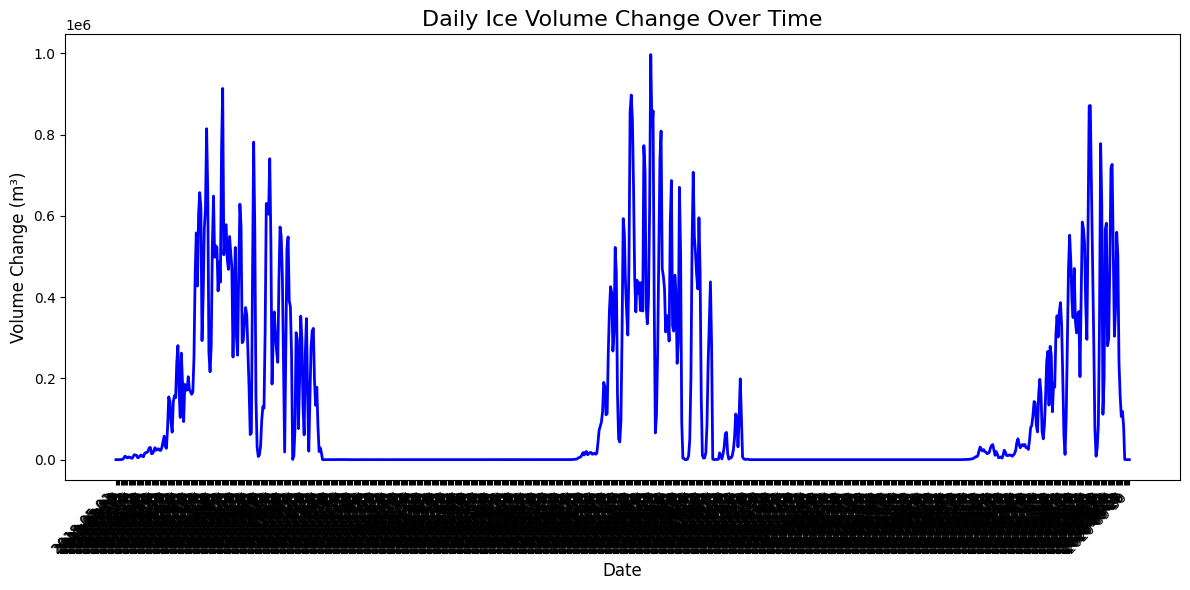

In [64]:
# Volumensänderung aller Gletscher pro Tag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pfad zur ASCII-Gletschermaske
mask_file = "C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"
#mask_file = "C:/Users/anne_/Desktop/Anne/glacier_selection_aoi.tif"
# Gletschermaske einlesen
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Erstelle eine Liste mit allen Tagen im angegebenen Zeitraum
dates_period = pd.date_range(start="2018-05-01", end="2020-09-30", freq='D')

# Initialisiere eine Liste zur Speicherung der Ergebnisse
vol_change_results = []

# Iteriere über alle Tage im Zeitraum
for date in dates_period:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Hole die Daten für Layer 3 (Eis)
        ice_layer_data = snow_thickness.isel(snow_layer=3).values  # Layer 3 = Eis

        # Berechne das Volumen pro Pixel (Mächtigkeit * Fläche)
        pixel_area = 50 * 50  # Fläche in m² pro Pixel
        ice_volume_per_pixel = ice_layer_data * pixel_area  # Volumen pro Pixel in m³

        # Summiere das Volumen für alle Pixel innerhalb der Gletschermaske
        total_ice_volume = np.sum(ice_volume_per_pixel * (glacier_mask == 1))  # Nur Pixel innerhalb der Maske

        # Berechne die relative Änderung des Volumens zum Vortag (falls verfügbar)
        if vol_change_results:
            prev_day_volume = vol_change_results[-1]['Volume']
            volume_change = prev_day_volume - total_ice_volume  # Differenz zum vorherigen Tag
        else:
            volume_change = 0  # Für den ersten Tag gibt es keine Änderung

        # Ergebnisse speichern
        vol_change_results.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Volume": total_ice_volume,
            "Volume Change (m³)": volume_change
        })

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")

# Konvertiere die Ergebnisse in einen DataFrame
vol_change_df = pd.DataFrame(vol_change_results)

# Setze das Datum als Index
vol_change_df.set_index("Date", inplace=True)

# Plot: Volumenänderung über die Zeit
fig, ax = plt.subplots(figsize=(12, 6))

# Plot der Volumenänderung
ax.plot(vol_change_df.index, vol_change_df["Volume Change (m³)"], color='blue', linewidth=2)

# Diagramm anpassen
ax.set_title("Daily Ice Volume Change Over Time", fontsize=16)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Volume Change (m³)", fontsize=12)
ax.set_xticklabels(vol_change_df.index, rotation=45, ha="right")

plt.tight_layout()
plt.savefig("Daily_Ice_Volume_Change.png")
plt.show()


C:\Users\anne_\AppData\Local\Temp\ipykernel_30944\2537064159.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vol_change_df.index, rotation=45, ha="right")


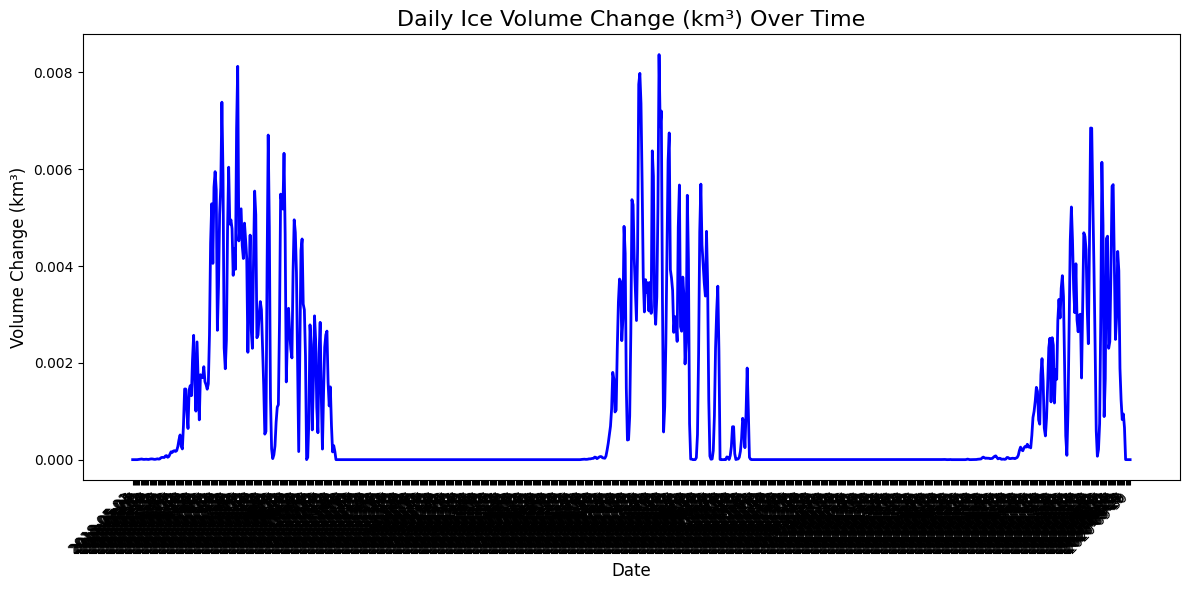

In [62]:
# gleiches in km3

# Volumensänderung aller Gletscher pro Tag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pfad zur ASCII-Gletschermaske
mask_file = "C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"
#mask_file = "C:/Users/anne_/Desktop/Anne/glacier_selection_aoi.tif"


# Gletschermaske einlesen
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Erstelle eine Liste mit allen Tagen im angegebenen Zeitraum
dates_period = pd.date_range(start="2018-05-01", end="2020-09-30", freq='D')

# Initialisiere eine Liste zur Speicherung der Ergebnisse
vol_change_results = []

# Iteriere über alle Tage im Zeitraum
for date in dates_period:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Hole die Daten für Layer 3 (Eis)
        ice_layer_data = snow_thickness.isel(snow_layer=3).values  # Layer 3 = Eis

        # Berechne das Volumen pro Pixel (Mächtigkeit * Fläche)
        pixel_area = 50 * 50  # Fläche in m² pro Pixel
        ice_volume_per_pixel = ice_layer_data * pixel_area  # Volumen pro Pixel in m³

        # Umrechnung von m³ in km³
        ice_volume_per_pixel_km3 = ice_volume_per_pixel / 1e9  # Umrechnung auf km³

        # Summiere das Volumen für alle Pixel innerhalb der Gletschermaske
        total_ice_volume_km3 = np.sum(ice_volume_per_pixel_km3 * (glacier_mask == 1))  # Nur Pixel innerhalb der Maske

        # Berechne die relative Änderung des Volumens zum Vortag (falls verfügbar)
        if vol_change_results:
            prev_day_volume = vol_change_results[-1]['Volume']
            volume_change = prev_day_volume - total_ice_volume_km3  # Differenz zum vorherigen Tag
        else:
            volume_change = 0  # Für den ersten Tag gibt es keine Änderung

        # Ergebnisse speichern
        vol_change_results.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Volume": total_ice_volume_km3,
            "Volume Change (km³)": volume_change
        })

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")

# Konvertiere die Ergebnisse in einen DataFrame
vol_change_df = pd.DataFrame(vol_change_results)

# Setze das Datum als Index
vol_change_df.set_index("Date", inplace=True)

# Plot: Volumenänderung in km³ über die Zeit
fig, ax = plt.subplots(figsize=(12, 6))

# Plot der Volumenänderung
ax.plot(vol_change_df.index, vol_change_df["Volume Change (km³)"], color='blue', linewidth=2)

# Diagramm anpassen
ax.set_title("Daily Ice Volume Change (km³) Over Time", fontsize=16)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Volume Change (km³)", fontsize=12)
ax.set_xticklabels(vol_change_df.index, rotation=45, ha="right")

plt.tight_layout()
plt.savefig("Daily_Ice_Volume_Change_km3.png")
plt.show()


C:\Users\anne_\AppData\Local\Temp\ipykernel_30944\260818963.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vol_change_df.index, rotation=45, ha="right")


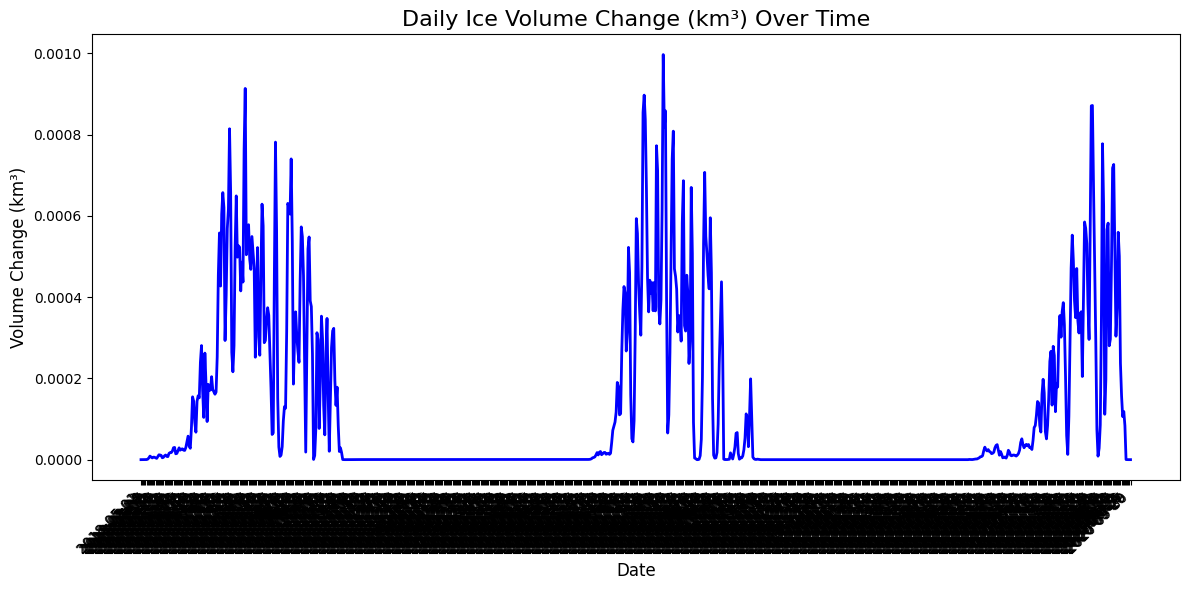

In [63]:
# nur für einen Gletscher rechnen um verlässlichkeit der Zahlen und Volumina zu checken? 
# Volumensänderung aller Gletscher pro Tag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pfad zur ASCII-Gletschermaske
#mask_file = "C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"
mask_file = "C:/Users/anne_/Desktop/Anne/glacier_selection_aoi.tif"


# Gletschermaske einlesen
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Erstelle eine Liste mit allen Tagen im angegebenen Zeitraum
dates_period = pd.date_range(start="2018-05-01", end="2020-09-30", freq='D')

# Initialisiere eine Liste zur Speicherung der Ergebnisse
vol_change_results = []

# Iteriere über alle Tage im Zeitraum
for date in dates_period:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Hole die Daten für Layer 3 (Eis)
        ice_layer_data = snow_thickness.isel(snow_layer=3).values  # Layer 3 = Eis

        # Berechne das Volumen pro Pixel (Mächtigkeit * Fläche)
        pixel_area = 50 * 50  # Fläche in m² pro Pixel
        ice_volume_per_pixel = ice_layer_data * pixel_area  # Volumen pro Pixel in m³

        # Umrechnung von m³ in km³
        ice_volume_per_pixel_km3 = ice_volume_per_pixel / 1e9  # Umrechnung auf km³

        # Summiere das Volumen für alle Pixel innerhalb der Gletschermaske
        total_ice_volume_km3 = np.sum(ice_volume_per_pixel_km3 * (glacier_mask == 755530))  # Nur Pixel innerhalb der Maske

        # Berechne die relative Änderung des Volumens zum Vortag (falls verfügbar)
        if vol_change_results:
            prev_day_volume = vol_change_results[-1]['Volume']
            volume_change = prev_day_volume - total_ice_volume_km3  # Differenz zum vorherigen Tag
        else:
            volume_change = 0  # Für den ersten Tag gibt es keine Änderung

        # Ergebnisse speichern
        vol_change_results.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Volume": total_ice_volume_km3,
            "Volume Change (km³)": volume_change
        })

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")

# Konvertiere die Ergebnisse in einen DataFrame
vol_change_df = pd.DataFrame(vol_change_results)

# Setze das Datum als Index
vol_change_df.set_index("Date", inplace=True)

# Plot: Volumenänderung in km³ über die Zeit
fig, ax = plt.subplots(figsize=(12, 6))

# Plot der Volumenänderung
ax.plot(vol_change_df.index, vol_change_df["Volume Change (km³)"], color='blue', linewidth=2)

# Diagramm anpassen
ax.set_title("Daily Ice Volume Change (km³) Over Time", fontsize=16)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Volume Change (km³)", fontsize=12)
ax.set_xticklabels(vol_change_df.index, rotation=45, ha="right")

plt.tight_layout()
plt.savefig("Daily_Ice_Volume_Change_km3.png")
plt.show()


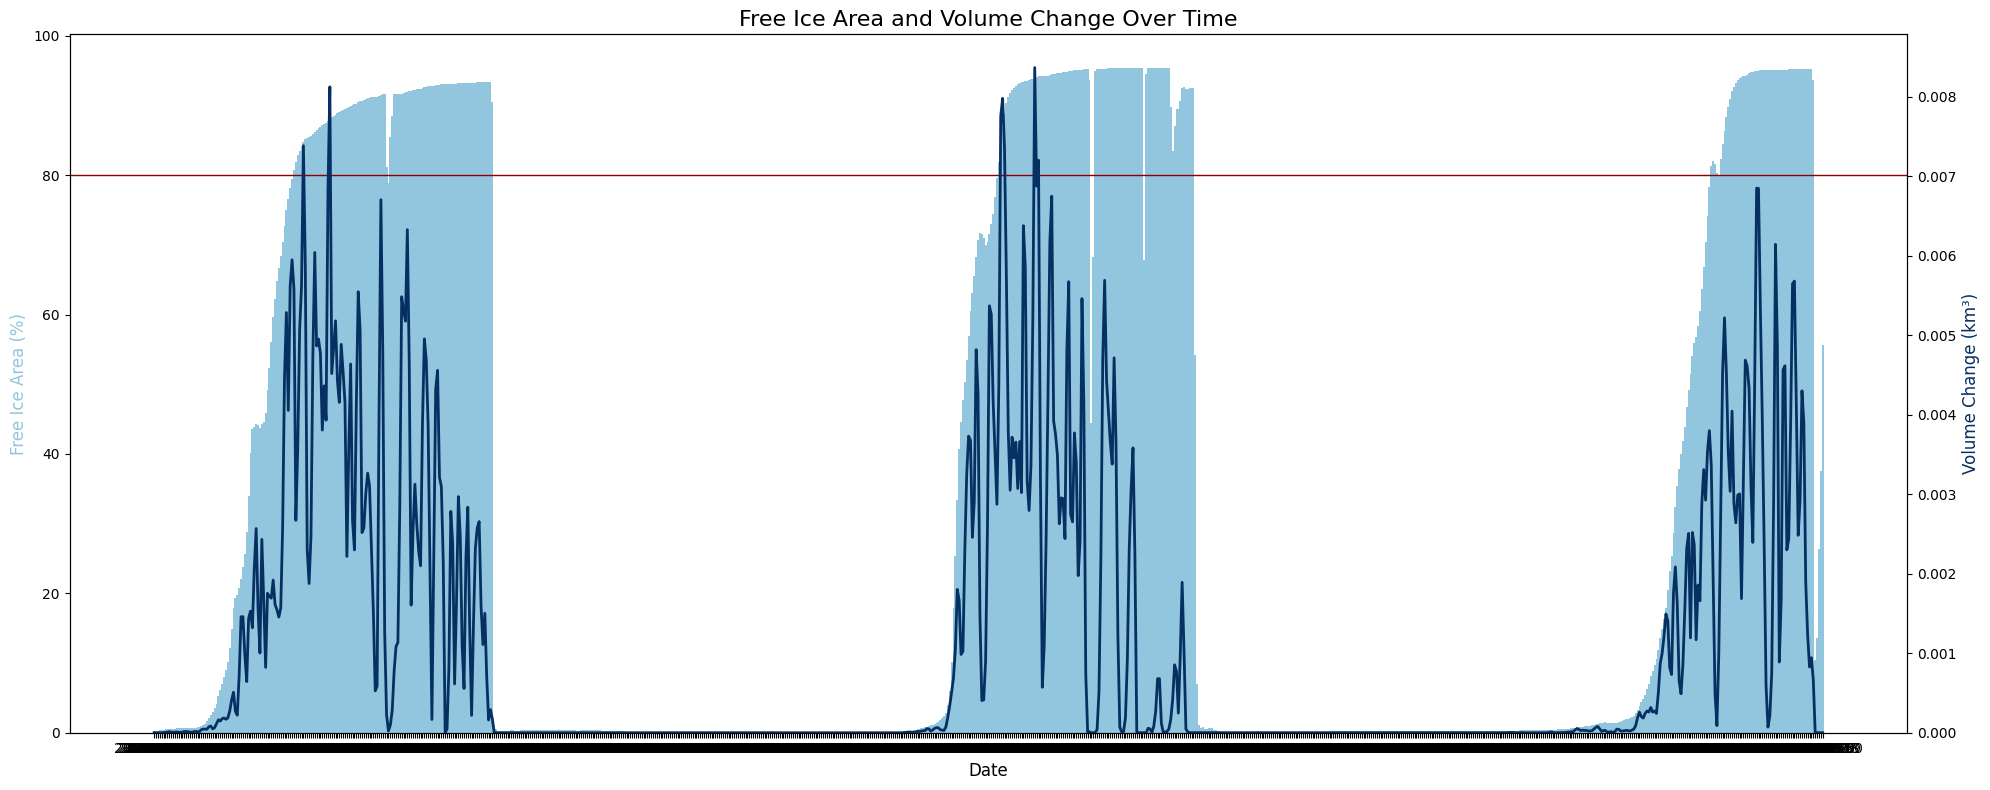

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio

# Gletschermaske einlesen
mask_file = "C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Erstelle eine Liste mit allen Tagen im angegebenen Zeitraum
dates_period = pd.date_range(start="2018-05-01", end="2020-09-30", freq='D')

# Ergebnisse für die 1. Grafik (freie Eisfläche)
results_free_ice_area = []

for date in dates_period:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Initialisiere eine leere Matrix für die Oberflächenschichten
        surface_layer = np.zeros_like(glacier_mask, dtype=np.int32)

        # Iteriere **vorwärts** über die Schichten (Layer 1 -> Layer 4)
        for i in range(1, 5):
            layer_index = i - 1
            layer_data = snow_thickness.isel(snow_layer=layer_index).values

            # Wende die Gletschermaske an und maskiere Werte <= 0.2
            mask = (glacier_mask == 1) & (layer_data > 0.2)

            # Setze Werte nur für Pixel, die noch nicht belegt sind
            surface_layer[mask & (surface_layer == 0)] = i

        # Berechne den Anteil des freien Eises
        total_surface_area = np.sum(glacier_mask == 1)  # Gesamtfläche der Gletschermaske
        layer_4_area = np.sum(surface_layer == 4)

        free_ice_area = (layer_4_area / total_surface_area) * 100 if total_surface_area > 0 else 0

        results_free_ice_area.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Free Ice Area (%)": free_ice_area
        })

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")

# DataFrame für die erste Grafik (freie Eisfläche)
free_ice_area_df = pd.DataFrame(results_free_ice_area)
free_ice_area_df.set_index("Date", inplace=True)

# Ergebnisse für die 2. Grafik (Volumensänderung)
vol_change_results = []

for date in dates_period:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Hole die Daten für Layer 3 (Eis)
        ice_layer_data = snow_thickness.isel(snow_layer=3).values  # Layer 3 = Eis

        # Berechne das Volumen pro Pixel (Mächtigkeit * Fläche)
        pixel_area = 50 * 50  # Fläche in m² pro Pixel
        ice_volume_per_pixel = ice_layer_data * pixel_area  # Volumen pro Pixel in m³

        # Umrechnung von m³ in km³
        ice_volume_per_pixel_km3 = ice_volume_per_pixel / 1e9  # Umrechnung auf km³

        # Summiere das Volumen für alle Pixel innerhalb der Gletschermaske
        total_ice_volume_km3 = np.sum(ice_volume_per_pixel_km3 * (glacier_mask == 1))  # Nur Pixel innerhalb der Maske

        # Berechne die relative Änderung des Volumens zum Vortag (falls verfügbar)
        if vol_change_results:
            prev_day_volume = vol_change_results[-1]['Volume']
            volume_change = prev_day_volume - total_ice_volume_km3  # Differenz zum vorherigen Tag
        else:
            volume_change = 0  # Für den ersten Tag gibt es keine Änderung

        vol_change_results.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Volume": total_ice_volume_km3,
            "Volume Change (km³)": volume_change
        })

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")

# DataFrame für die zweite Grafik (Volumensänderung)
vol_change_df = pd.DataFrame(vol_change_results)
vol_change_df.set_index("Date", inplace=True)

# Plot: Kombinierte Grafik (freie Eisfläche und Volumensänderung)
fig, ax1 = plt.subplots(figsize=(20, 8))  # Breite erhöht für mehr Platz

# Linke Y-Achse: Freie Eisfläche (prozentual) als Säulen-Diagramm
ax1.bar(free_ice_area_df.index, free_ice_area_df["Free Ice Area (%)"], color="#92c5de", width=1)

# Füge eine horizontale Linie bei 80% auf der y-Achse hinzu
ax1.axhline(y=80, color='darkred', linestyle='-', linewidth=1) 
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Free Ice Area (%)", fontsize=12, color="#92c5de")
ax1.tick_params(axis='y', labelcolor='black')

# Erstelle eine zweite Y-Achse für die Volumensänderung
ax2 = ax1.twinx()  # Zweite Y-Achse
ax2.plot(vol_change_df.index, vol_change_df["Volume Change (km³)"], color="#053061", linewidth=2)
ax2.set_ylabel("Volume Change (km³)", fontsize=12, color="#053061")
ax2.tick_params(axis='y', labelcolor='black')

# Setze die Y-Achse für das Volumen ebenfalls bei 0, um beide Grafiken übereinander zu legen
ax2.set_ylim(bottom=0)


# Diagramm anpassen
ax1.set_title("Free Ice Area and Volume Change Over Time", fontsize=16)

# Diagramm speichern und anzeigen
try:
    plt.tight_layout()
    plt.savefig("Free_Ice_Area_and_Volume_Change.png")
    plt.show()
except Exception as e:
    print(f"Fehler beim Speichern oder Anzeigen des Plots: {e}")


AttributeError: 'str' object has no attribute 'strftime'

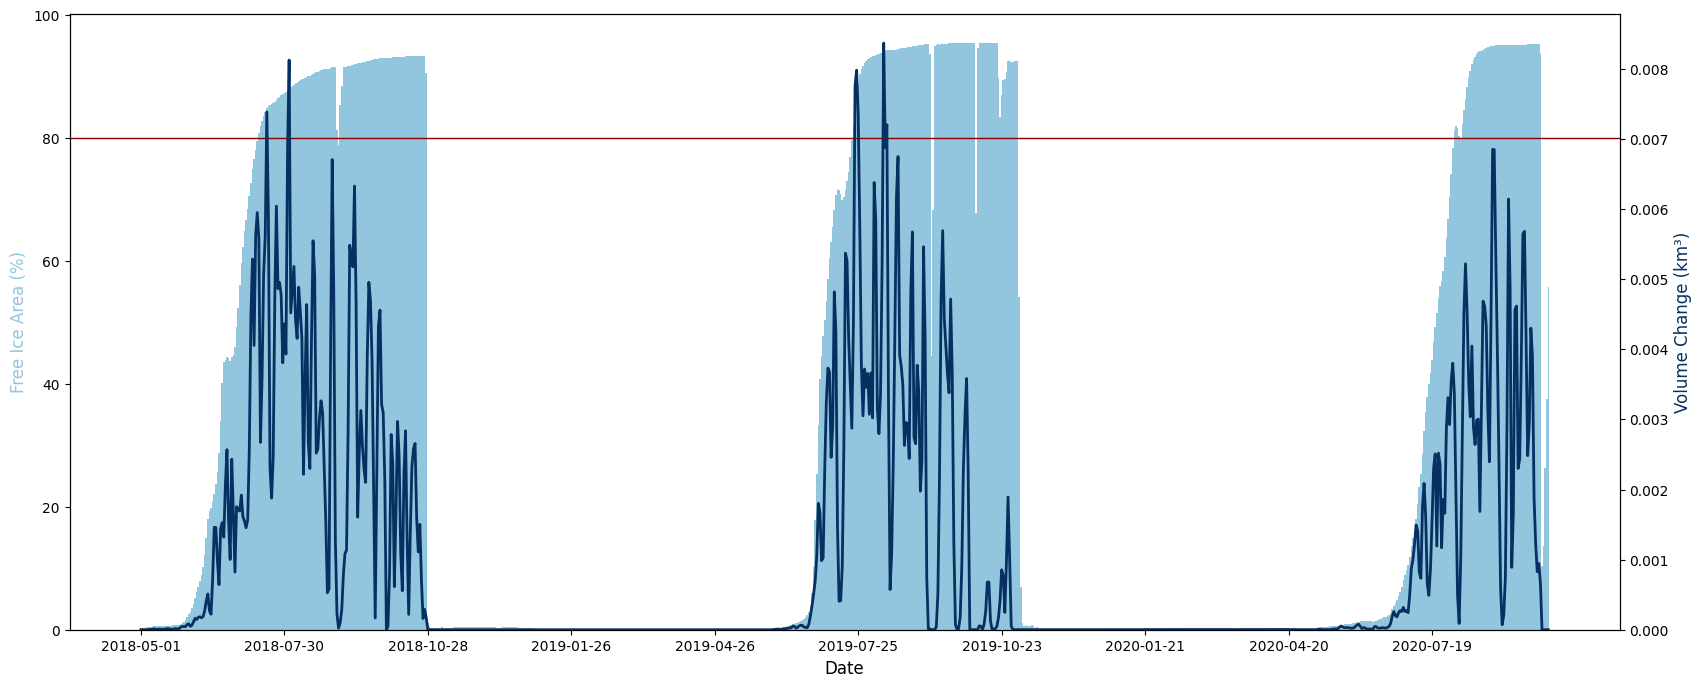

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio

# Gletschermaske einlesen
mask_file = "C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Erstelle eine Liste mit allen Tagen im angegebenen Zeitraum
dates_period = pd.date_range(start="2018-05-01", end="2020-09-30", freq='D')

# Ergebnisse für die 1. Grafik (freie Eisfläche)
results_free_ice_area = []

for date in dates_period:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Initialisiere eine leere Matrix für die Oberflächenschichten
        surface_layer = np.zeros_like(glacier_mask, dtype=np.int32)

        # Iteriere **vorwärts** über die Schichten (Layer 1 -> Layer 4)
        for i in range(1, 5):
            layer_index = i - 1
            layer_data = snow_thickness.isel(snow_layer=layer_index).values

            # Wende die Gletschermaske an und maskiere Werte <= 0.2
            mask = (glacier_mask == 1) & (layer_data > 0.2)

            # Setze Werte nur für Pixel, die noch nicht belegt sind
            surface_layer[mask & (surface_layer == 0)] = i

        # Berechne den Anteil des freien Eises
        total_surface_area = np.sum(glacier_mask == 1)  # Gesamtfläche der Gletschermaske
        layer_4_area = np.sum(surface_layer == 4)

        free_ice_area = (layer_4_area / total_surface_area) * 100 if total_surface_area > 0 else 0

        results_free_ice_area.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Free Ice Area (%)": free_ice_area
        })

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")

# DataFrame für die erste Grafik (freie Eisfläche)
free_ice_area_df = pd.DataFrame(results_free_ice_area)
free_ice_area_df.set_index("Date", inplace=True)

# Ergebnisse für die 2. Grafik (Volumensänderung)
vol_change_results = []

for date in dates_period:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Hole die Daten für Layer 3 (Eis)
        ice_layer_data = snow_thickness.isel(snow_layer=3).values  # Layer 3 = Eis

        # Berechne das Volumen pro Pixel (Mächtigkeit * Fläche)
        pixel_area = 50 * 50  # Fläche in m² pro Pixel
        ice_volume_per_pixel = ice_layer_data * pixel_area  # Volumen pro Pixel in m³

        # Umrechnung von m³ in km³
        ice_volume_per_pixel_km3 = ice_volume_per_pixel / 1e9  # Umrechnung auf km³

        # Summiere das Volumen für alle Pixel innerhalb der Gletschermaske
        total_ice_volume_km3 = np.sum(ice_volume_per_pixel_km3 * (glacier_mask == 1))  # Nur Pixel innerhalb der Maske

        # Berechne die relative Änderung des Volumens zum Vortag (falls verfügbar)
        if vol_change_results:
            prev_day_volume = vol_change_results[-1]['Volume']
            volume_change = prev_day_volume - total_ice_volume_km3  # Differenz zum vorherigen Tag
        else:
            volume_change = 0  # Für den ersten Tag gibt es keine Änderung

        vol_change_results.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Volume": total_ice_volume_km3,
            "Volume Change (km³)": volume_change
        })

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")

# DataFrame für die zweite Grafik (Volumensänderung)
vol_change_df = pd.DataFrame(vol_change_results)
vol_change_df.set_index("Date", inplace=True)

# Plot: Kombinierte Grafik (freie Eisfläche und Volumensänderung)
fig, ax1 = plt.subplots(figsize=(20, 8))  # Breite erhöht für mehr Platz

# Linke Y-Achse: Freie Eisfläche (prozentual) als Säulen-Diagramm
ax1.bar(free_ice_area_df.index, free_ice_area_df["Free Ice Area (%)"], color="#92c5de", width=1)

# Füge eine horizontale Linie bei 80% auf der y-Achse hinzu
ax1.axhline(y=80, color='darkred', linestyle='-', linewidth=1) 
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Free Ice Area (%)", fontsize=12, color="#92c5de")
ax1.tick_params(axis='y', labelcolor='black')

# Erstelle eine zweite Y-Achse für die Volumensänderung
ax2 = ax1.twinx()  # Zweite Y-Achse
ax2.plot(vol_change_df.index, vol_change_df["Volume Change (km³)"], color="#053061", linewidth=2)
ax2.set_ylabel("Volume Change (km³)", fontsize=12, color="#053061")
ax2.tick_params(axis='y', labelcolor='black')

# Setze die Y-Achse für das Volumen ebenfalls bei 0, um beide Grafiken übereinander zu legen
ax2.set_ylim(bottom=0)

# Setze die xticks nur auf jedes 366ste Datum (normalerweise für Schaltjahre)
xticks_indices = range(0, len(free_ice_area_df.index), 90)
ax1.set_xticks(xticks_indices)

# Anzeige der Beschriftungen für die xticks (nur jedes 366ste Datum)
# Verwenden von map und strftime für die x-Achsen-Beschriftungen
xtick_labels = list(map(lambda x: x.strftime("%Y-%m-%d"),free_ice_area_df.index[xticks_indices]))
ax1.set_xticklabels(xtick_labels, rotation=45, ha="right")

# Diagramm anpassen
ax1.set_title("Free Ice Area and Volume Change Over Time", fontsize=16)

# Diagramm speichern und anzeigen
try:
    plt.tight_layout()
    plt.savefig("Free_Ice_Area_and_Volume_Change.png")
    plt.show()
except Exception as e:
    print(f"Fehler beim Speichern oder Anzeigen des Plots: {e}")


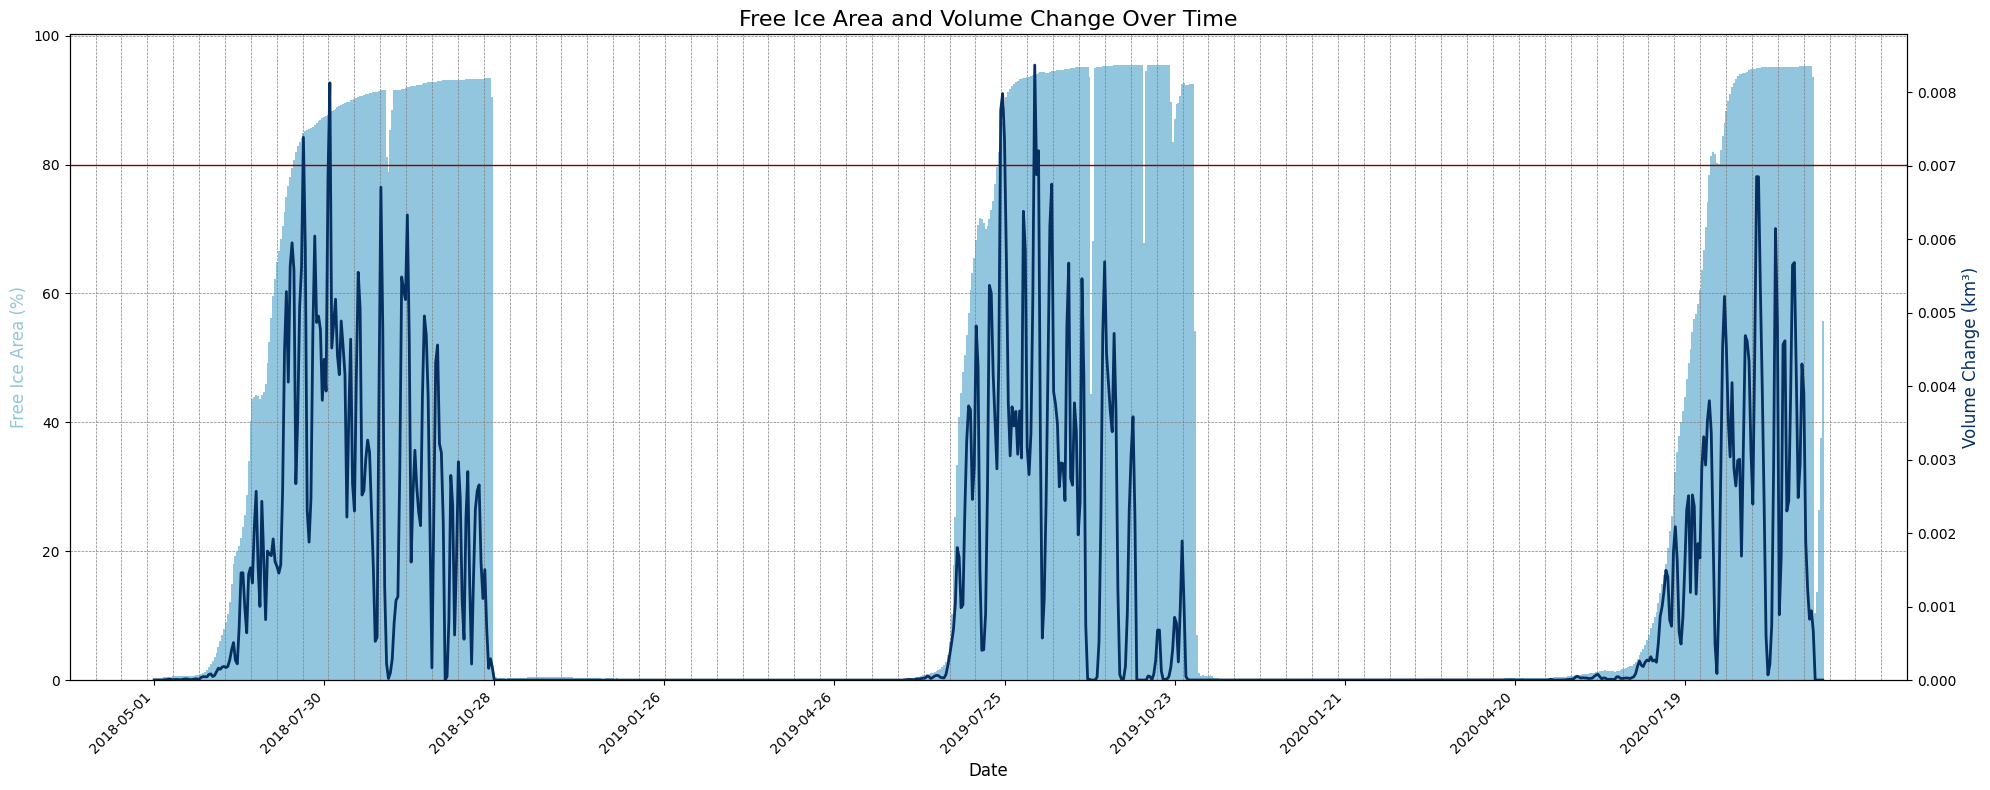

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio

# Gletschermaske einlesen
mask_file = "C:/Users/anne_/Desktop/Anne/openamundsen-examples-main/openamundsen-examples-main/rofental/grids/OG ROI/all glacier extent/roi_rofental_50i.asc"
with rasterio.open(mask_file) as src:
    glacier_mask = src.read(1)  # Erstes Rasterband

# Erstelle eine Liste mit allen Tagen im angegebenen Zeitraum
dates_period = pd.date_range(start="2018-05-01", end="2020-09-30", freq='D')

# Ergebnisse für die 1. Grafik (freie Eisfläche)
results_free_ice_area = []

for date in dates_period:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Initialisiere eine leere Matrix für die Oberflächenschichten
        surface_layer = np.zeros_like(glacier_mask, dtype=np.int32)

        # Iteriere **vorwärts** über die Schichten (Layer 1 -> Layer 4)
        for i in range(1, 5):
            layer_index = i - 1
            layer_data = snow_thickness.isel(snow_layer=layer_index).values

            # Wende die Gletschermaske an und maskiere Werte <= 0.2
            mask = (glacier_mask == 1) & (layer_data > 0.2)

            # Setze Werte nur für Pixel, die noch nicht belegt sind
            surface_layer[mask & (surface_layer == 0)] = i

        # Berechne den Anteil des freien Eises
        total_surface_area = np.sum(glacier_mask == 1)  # Gesamtfläche der Gletschermaske
        layer_4_area = np.sum(surface_layer == 4)

        free_ice_area = (layer_4_area / total_surface_area) * 100 if total_surface_area > 0 else 0

        results_free_ice_area.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Free Ice Area (%)": free_ice_area
        })

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")

# DataFrame für die erste Grafik (freie Eisfläche)
free_ice_area_df = pd.DataFrame(results_free_ice_area)
free_ice_area_df.set_index("Date", inplace=True)

# Ergebnisse für die 2. Grafik (Volumensänderung)
vol_change_results = []

for date in dates_period:
    target_date = f'{date.strftime("%Y-%m-%d")}T21:00:00.000000000'

    try:
        # Wähle den entsprechenden Zeitschritt
        snow_thickness = nc['snow_thickness_day'].sel(time2=target_date, method='nearest')

        # Hole die Daten für Layer 3 (Eis)
        ice_layer_data = snow_thickness.isel(snow_layer=3).values  # Layer 3 = Eis

        # Berechne das Volumen pro Pixel (Mächtigkeit * Fläche)
        pixel_area = 50 * 50  # Fläche in m² pro Pixel
        ice_volume_per_pixel = ice_layer_data * pixel_area  # Volumen pro Pixel in m³

        # Umrechnung von m³ in km³
        ice_volume_per_pixel_km3 = ice_volume_per_pixel / 1e9  # Umrechnung auf km³

        # Summiere das Volumen für alle Pixel innerhalb der Gletschermaske
        total_ice_volume_km3 = np.sum(ice_volume_per_pixel_km3 * (glacier_mask == 1))  # Nur Pixel innerhalb der Maske

        # Berechne die relative Änderung des Volumens zum Vortag (falls verfügbar)
        if vol_change_results:
            prev_day_volume = vol_change_results[-1]['Volume']
            volume_change = prev_day_volume - total_ice_volume_km3  # Differenz zum vorherigen Tag
        else:
            volume_change = 0  # Für den ersten Tag gibt es keine Änderung

        vol_change_results.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Volume": total_ice_volume_km3,
            "Volume Change (km³)": volume_change
        })

    except Exception as e:
        print(f"Fehler für {target_date}: {e}. Überspringe.")

# DataFrame für die zweite Grafik (Volumensänderung)
vol_change_df = pd.DataFrame(vol_change_results)
vol_change_df.set_index("Date", inplace=True)

# Plot: Kombinierte Grafik (freie Eisfläche und Volumensänderung)
fig, ax1 = plt.subplots(figsize=(20, 8))  # Breite erhöht für mehr Platz

# Linke Y-Achse: Freie Eisfläche (prozentual) als Säulen-Diagramm
ax1.bar(free_ice_area_df.index, free_ice_area_df["Free Ice Area (%)"], color="#92c5de", width=1)

# Füge eine horizontale Linie bei 80% auf der y-Achse hinzu
ax1.axhline(y=80, color='darkred', linestyle='-', linewidth=1) 
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Free Ice Area (%)", fontsize=12, color="#92c5de")
ax1.tick_params(axis='y', labelcolor='black')

# Erstelle eine zweite Y-Achse für die Volumensänderung
ax2 = ax1.twinx()  # Zweite Y-Achse
ax2.plot(vol_change_df.index, vol_change_df["Volume Change (km³)"], color="#053061", linewidth=2)
ax2.set_ylabel("Volume Change (km³)", fontsize=12, color="#053061")
ax2.tick_params(axis='y', labelcolor='black')

# Setze die Y-Achse für das Volumen ebenfalls bei 0, um beide Grafiken übereinander zu legen
ax2.set_ylim(bottom=0)

# Stelle sicher, dass der Index als DatetimeIndex vorliegt
free_ice_area_df.index = pd.to_datetime(free_ice_area_df.index)

# Gitterlinien: Vertikale Gitterlinien im Monatsabstand
num_vertical_lines = 72
x_min, x_max = ax1.get_xlim()  # Hole die x-Achsen-Grenzen (Zeitspanne)
vertical_lines = np.linspace(x_min, x_max, num_vertical_lines)

# Zeichne das Gitter mit den vertikalen Linien und den bestehenden horizontalen Linien
ax1.grid(True, which='both', axis='y', linestyle='--', color='gray', linewidth=0.5)  # horizontale Linien

# Vertikale Gitterlinien manuell hinzufügen
for line in vertical_lines:
    ax1.axvline(x=line, color='gray', linestyle='--', linewidth=0.5)

# Setze die xticks nur auf jedes 366ste Datum (normalerweise für Schaltjahre)
xticks_indices = range(0, len(free_ice_area_df.index), 90)  # Anpassen auf Monatsabstände
ax1.set_xticks(xticks_indices)

# Anzeige der Beschriftungen für die xticks (nur jedes 366ste Datum)
# Verwenden von map und strftime für die x-Achsen-Beschriftungen
xtick_labels = list(map(lambda x: x.strftime("%Y-%m-%d"), free_ice_area_df.index[xticks_indices]))
ax1.set_xticklabels(xtick_labels, rotation=45, ha="right")

# Diagramm anpassen
ax1.set_title("Free Ice Area and Volume Change Over Time", fontsize=16)

# Diagramm speichern und anzeigen
try:
    plt.tight_layout()
    plt.savefig("Free_Ice_Area_and_Volume_Change.png")
    plt.show()
except Exception as e:
    print(f"Fehler beim Speichern oder Anzeigen des Plots: {e}")



In [ ]:
# jetzt noch rausrechnen wie viel Volumen in der Zeit schmilzt in der die >80% überschritten werden. Pro jahr rechnen 
#und pro quadratmeter runterrechnen und maybe für einzelne gletscher